In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import pylab as pl
from pyramid.arima import ARIMA, auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.simplefilter("ignore")

### Data import

In [47]:
data_df = pd.read_csv('dataset.csv')
data_df = data_df.loc[:, ~data_df.columns.str.contains('^Unnamed')]
print(data_df.shape)

(36550, 24)


In [48]:
num_list = []
for i in range(24):
    num_list.append(str(i))
data_df = data_df[num_list].copy()
data_df = np.transpose(data_df)
print(data_df.shape)
print(data_df.head())

(24, 36550)
      0         1         2         3         4         5         6      \
0  0.640992  0.727366  0.576215  0.545552  0.437467  0.407644  0.143438   
1 -0.229835 -0.262270 -0.675886  0.029008  0.715036  0.858843  0.899437   
2  0.920756  0.906956  0.870817  0.864728  0.821998  0.844808  0.848765   
3 -0.573034 -0.801510 -0.804918 -0.625199 -0.421767 -0.029434  0.326104   
4  0.829274  0.885971  0.927328  0.864096  0.596299  0.197213 -0.322776   

      7         8         9      ...     36540     36541     36542     36543  \
0 -0.009333 -0.126926 -0.331174  ...  0.362682  0.469607  0.439827  0.318619   
1  0.923717  0.936019  0.938473  ...  0.189809 -0.200912  0.003379  0.411594   
2  0.716539  0.205265 -0.153529  ...  0.826723  0.604590  0.042460  0.173725   
3  0.572719  0.733631  0.794323  ... -0.146596 -0.131321  0.436525  0.930743   
4 -0.546441 -0.629695 -0.630270  ...  0.829108  0.837513  0.800002  0.653209   

      36544     36545     36546     36547     36548     

### Train-Dev-Test Split

In [55]:
indices_int = 10
b = data_df.shape[1]

indices = [indices_int*k for k in range(b)]
data_df = pd.DataFrame(data_df[indices])

train = []
dev = []
test1 = []
test2 = []

for i in range(data_df.shape[1]):
    tmp = data_df[indices_int*i].copy()
    train.append(tmp[:21])
    dev.append(tmp[1:22])
    test1.append(tmp[2:23])
    test2.append(tmp[3:24])
    
train = pd.DataFrame(train)
dev = pd.DataFrame(dev)
test1 = pd.DataFrame(test1)
test2 = pd.DataFrame(test2)


In [56]:
train.to_csv('train.csv')
dev.to_csv('dev.csv')
test1.to_csv('test1.csv')
test2.to_csv('test2.csv')


### EDA for ARIMA modeling

5822


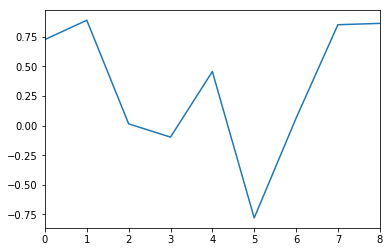

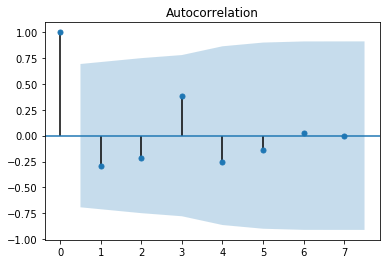

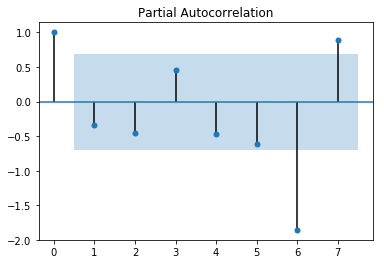

----------------------------------------------------
11414


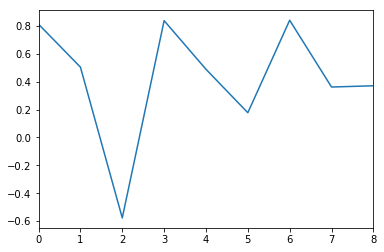

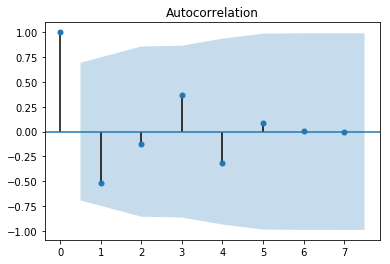

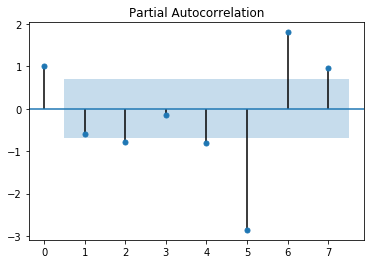

----------------------------------------------------
4655


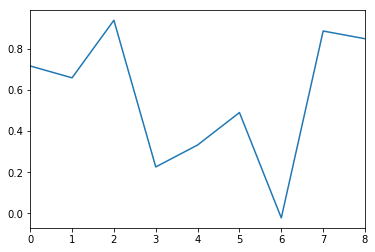

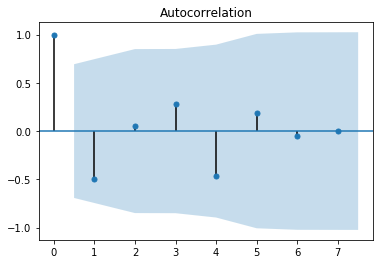

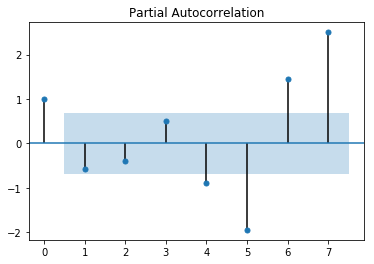

----------------------------------------------------
5721


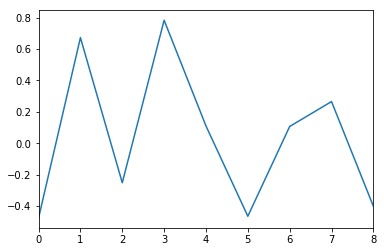

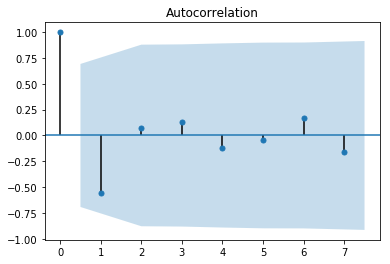

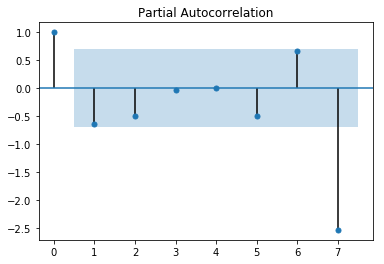

----------------------------------------------------
13555


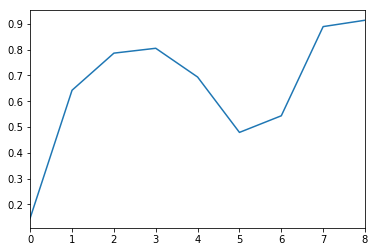

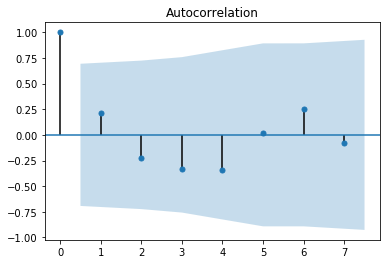

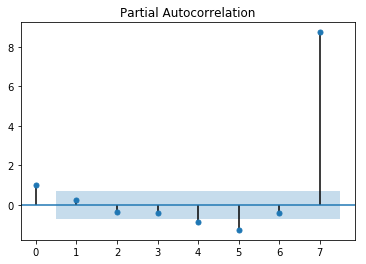

----------------------------------------------------
8297


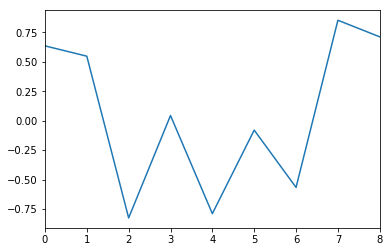

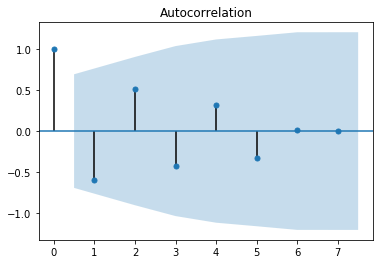

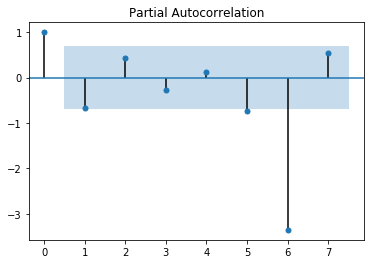

----------------------------------------------------
13663


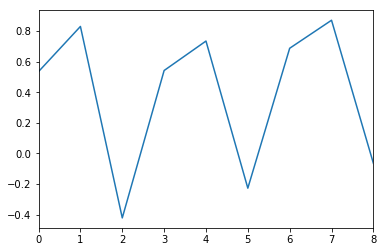

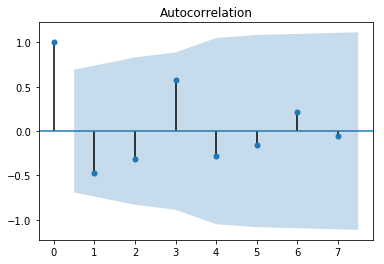

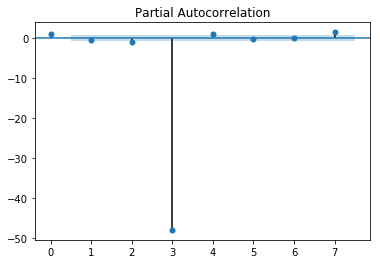

----------------------------------------------------
9441


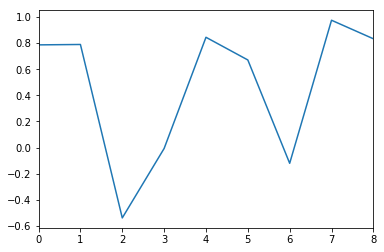

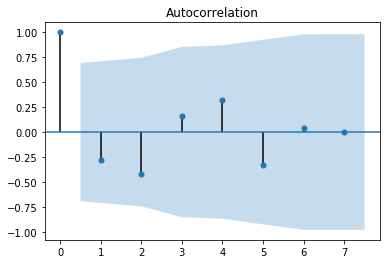

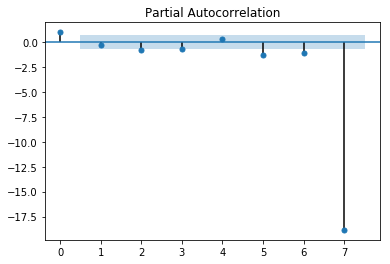

----------------------------------------------------
15387


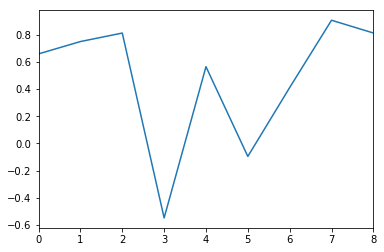

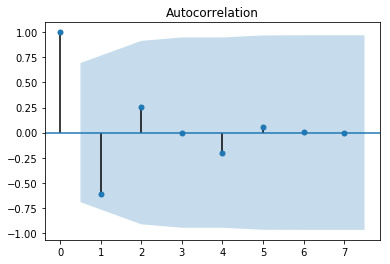

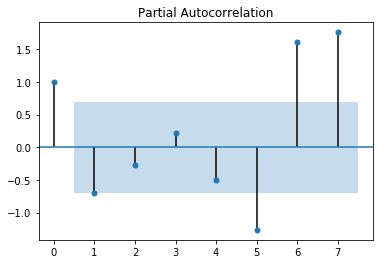

----------------------------------------------------
14191


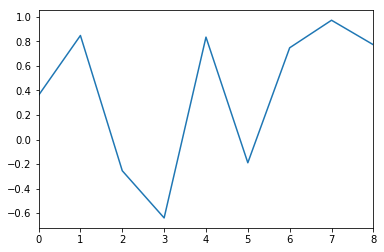

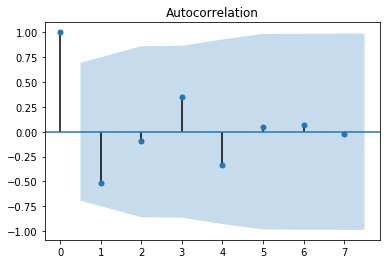

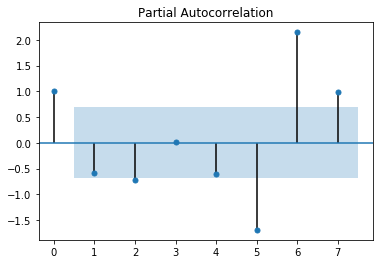

----------------------------------------------------
16065


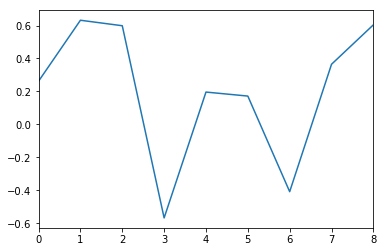

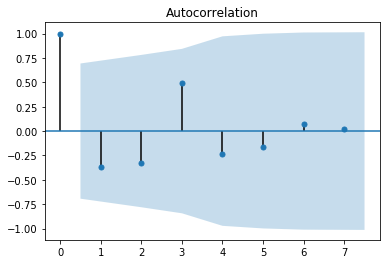

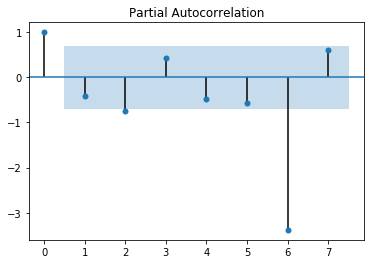

----------------------------------------------------
8806


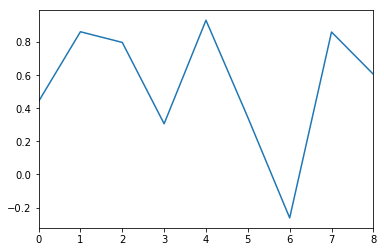

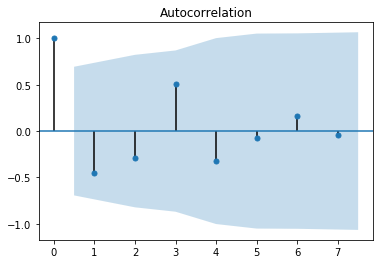

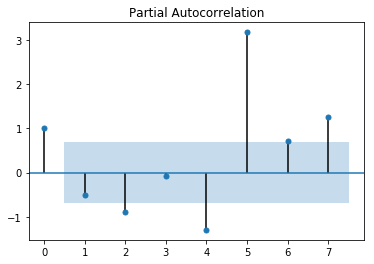

----------------------------------------------------
5282


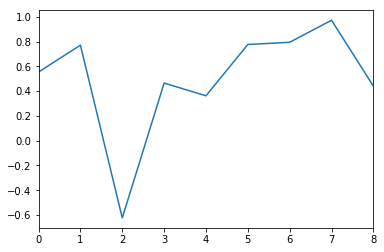

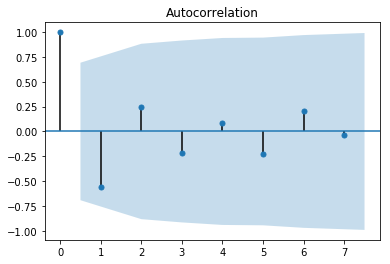

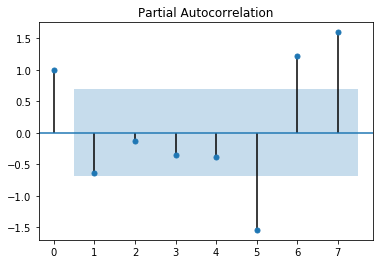

----------------------------------------------------
2886


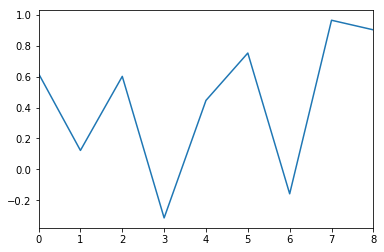

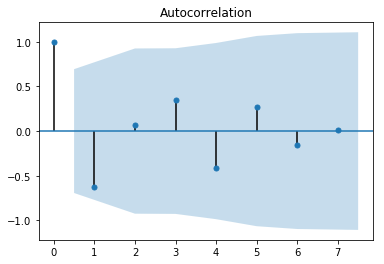

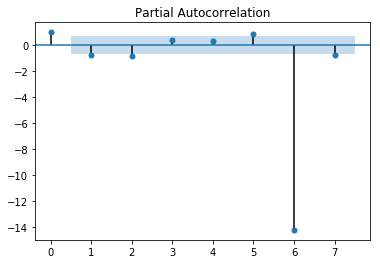

----------------------------------------------------
7200


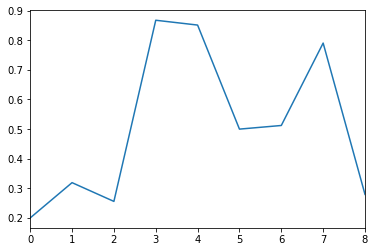

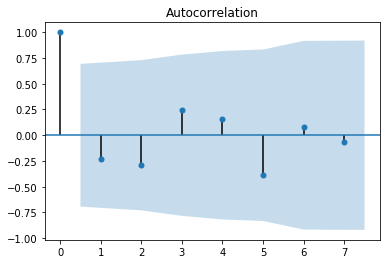

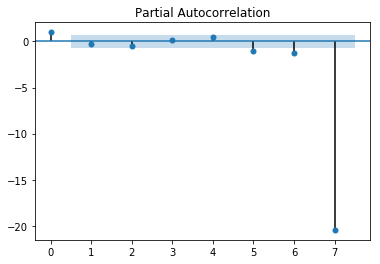

----------------------------------------------------
11114


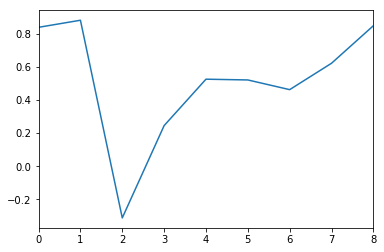

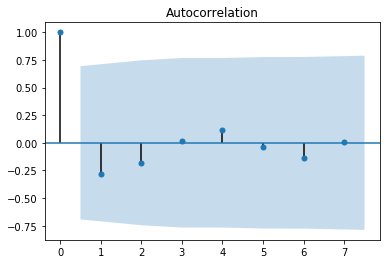

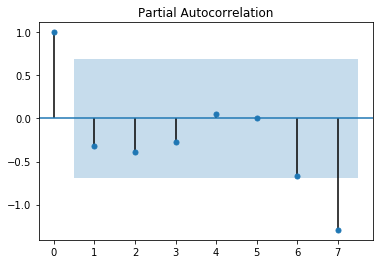

----------------------------------------------------
6215


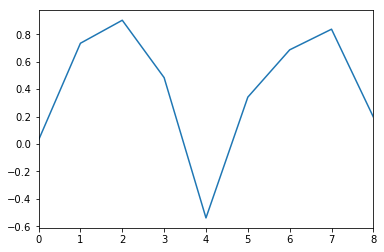

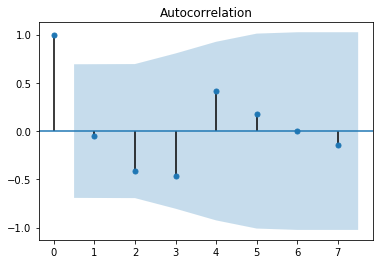

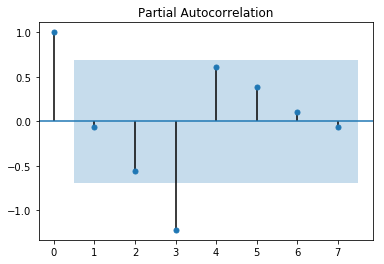

----------------------------------------------------
6849


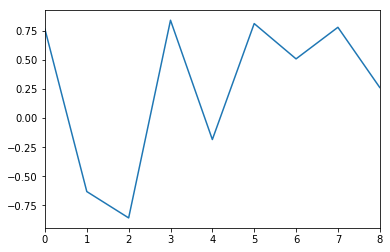

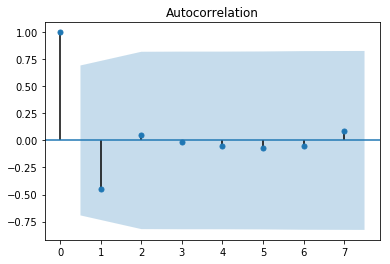

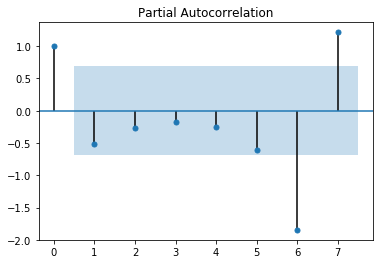

----------------------------------------------------
5486


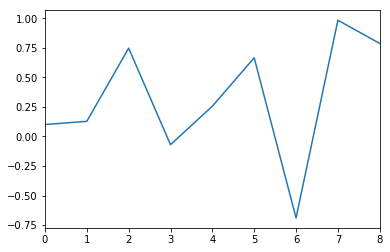

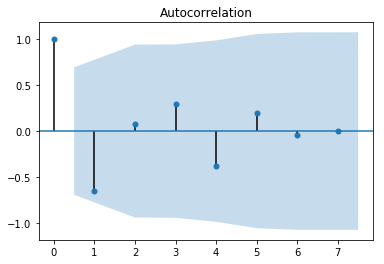

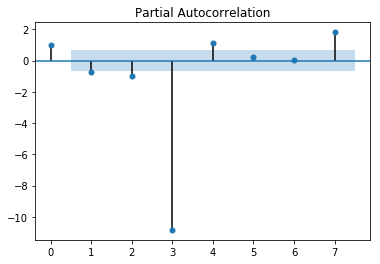

----------------------------------------------------
10192


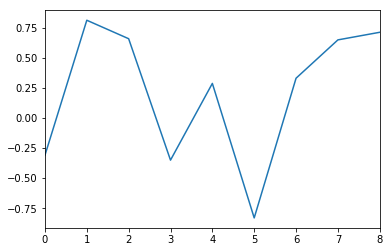

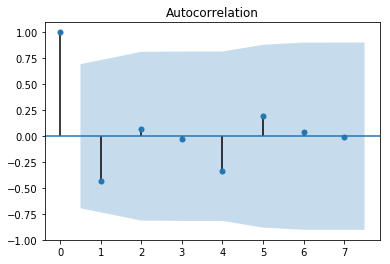

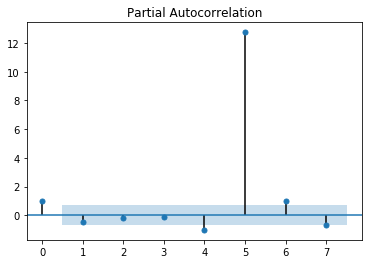

----------------------------------------------------
8077


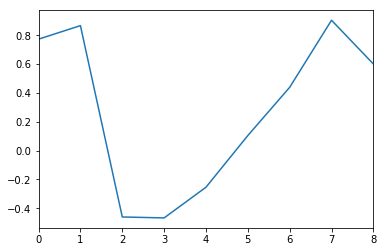

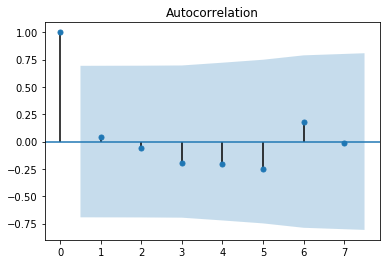

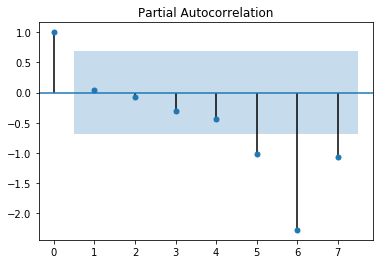

----------------------------------------------------
3878


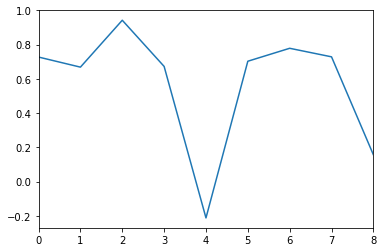

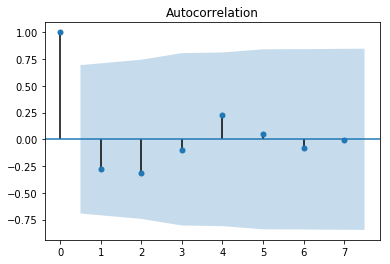

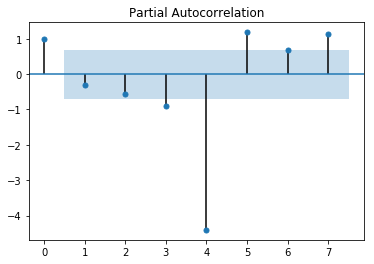

----------------------------------------------------
10149


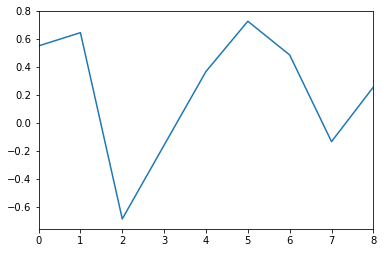

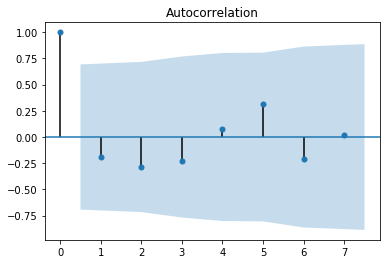

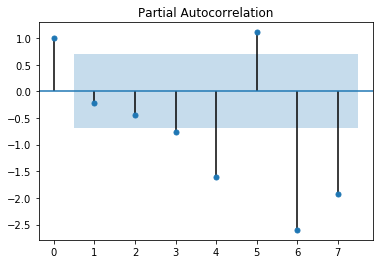

----------------------------------------------------
17630


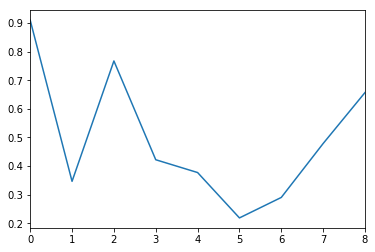

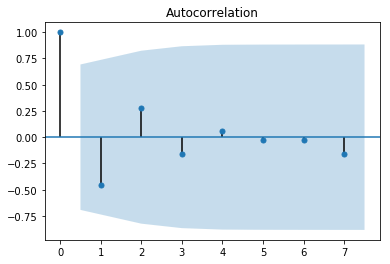

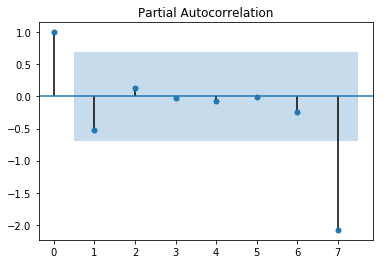

----------------------------------------------------
7134


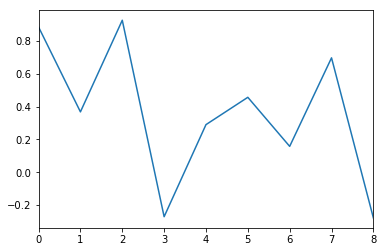

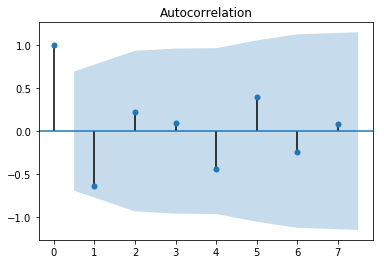

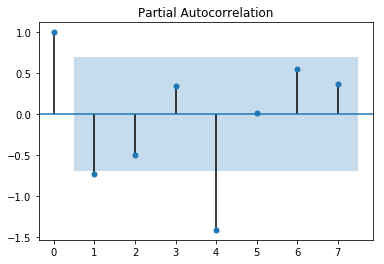

----------------------------------------------------
10788


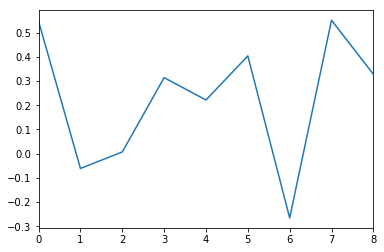

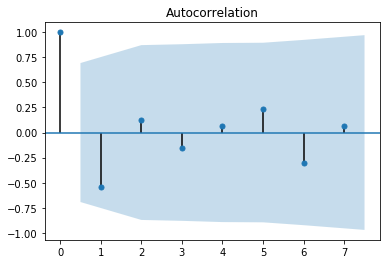

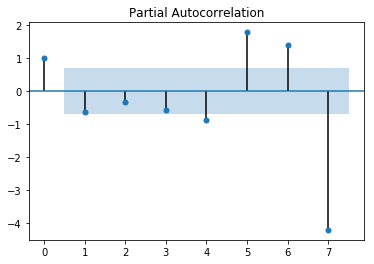

----------------------------------------------------
17047


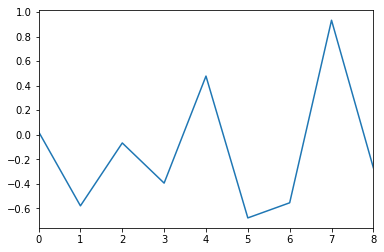

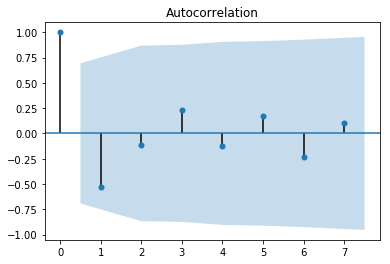

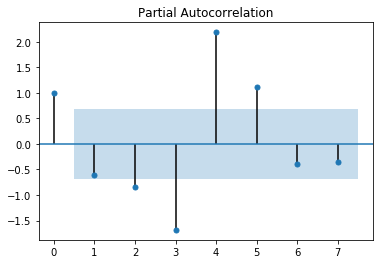

----------------------------------------------------
7630


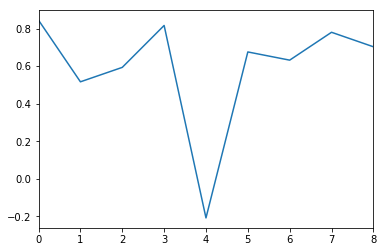

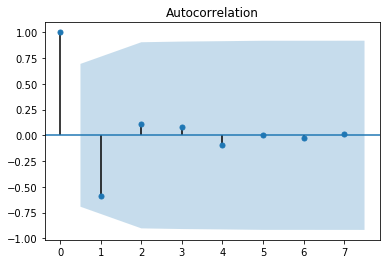

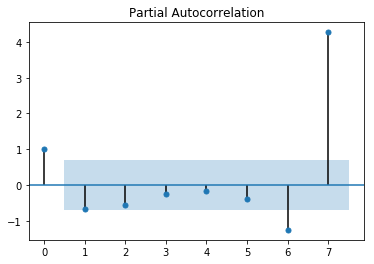

----------------------------------------------------
938


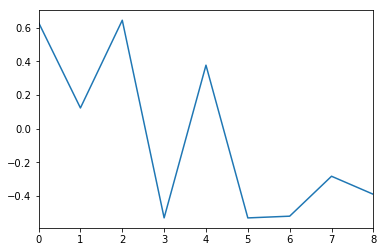

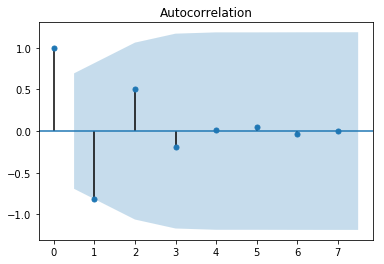

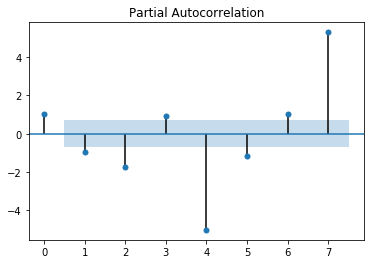

----------------------------------------------------
1476


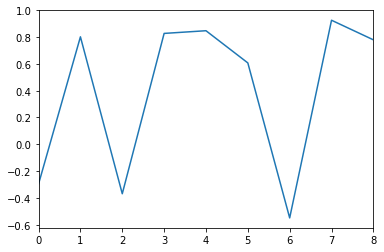

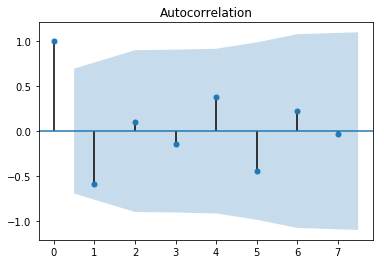

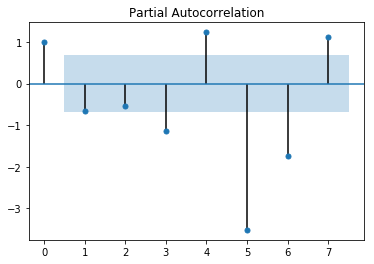

----------------------------------------------------
11065


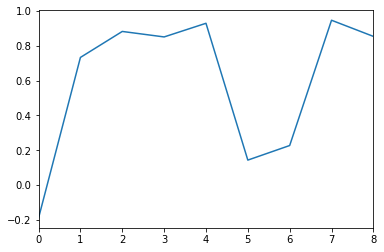

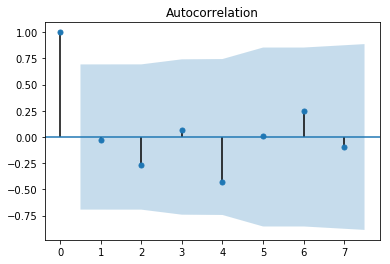

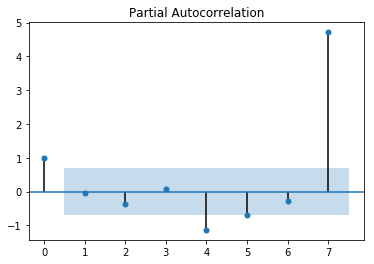

----------------------------------------------------
2574


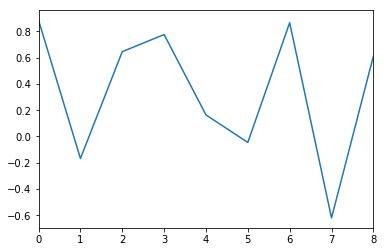

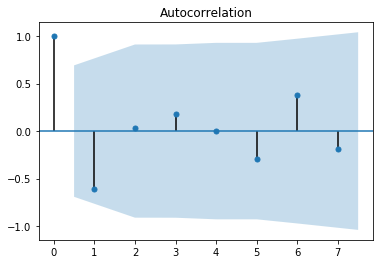

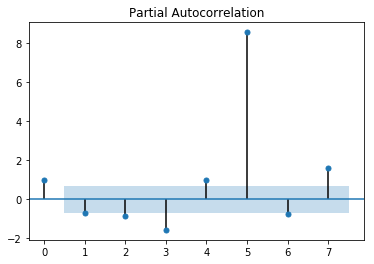

----------------------------------------------------
13487


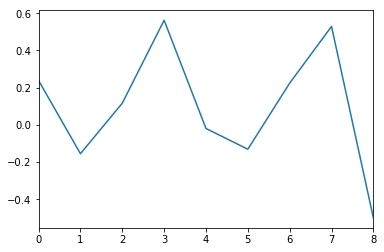

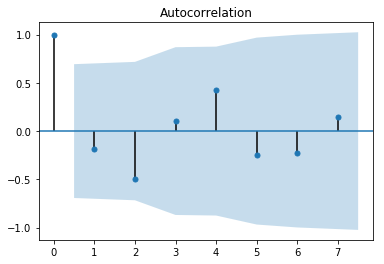

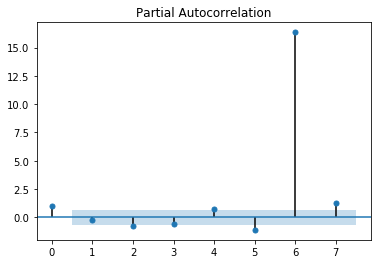

----------------------------------------------------
9838


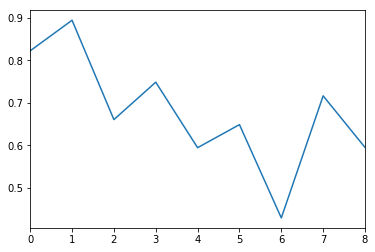

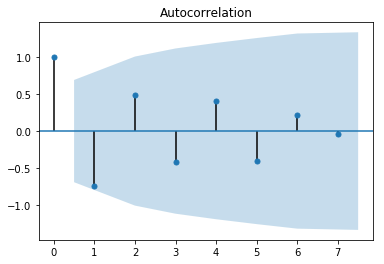

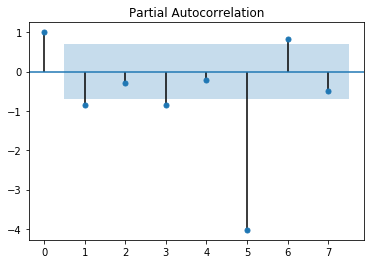

----------------------------------------------------
18088


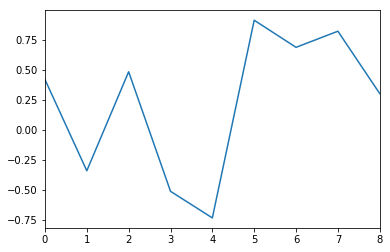

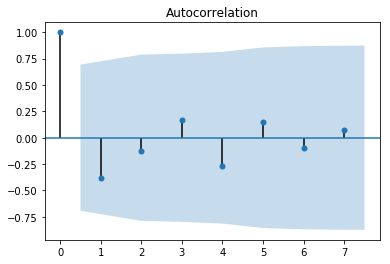

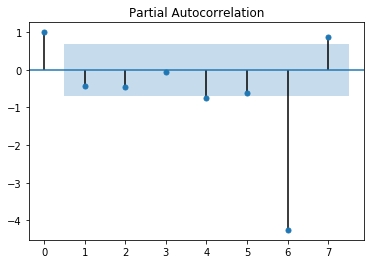

----------------------------------------------------
9032


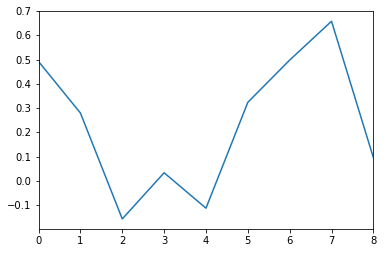

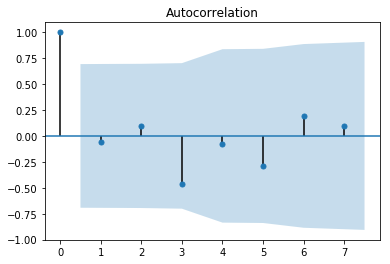

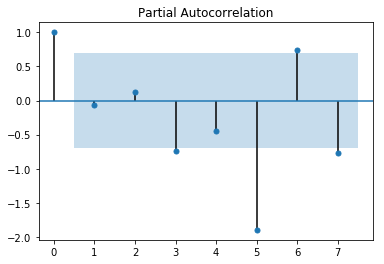

----------------------------------------------------
7993


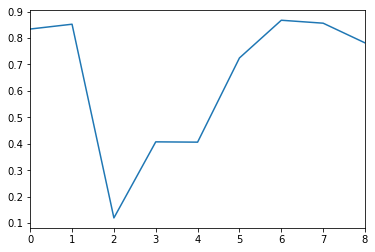

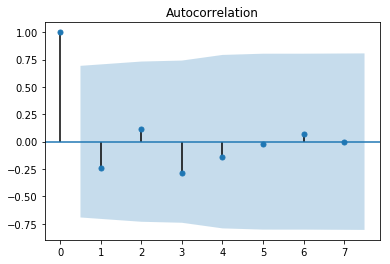

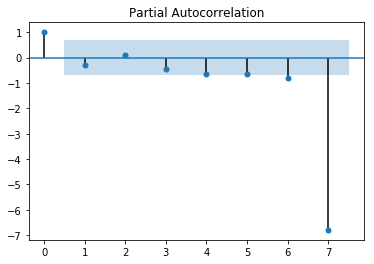

----------------------------------------------------
12414


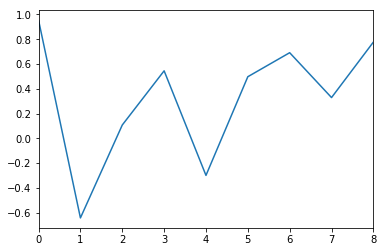

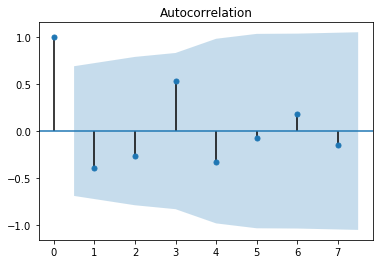

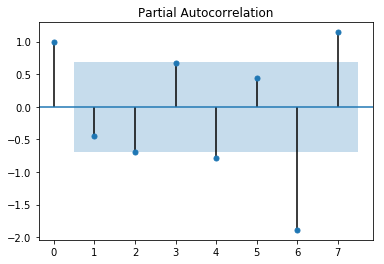

----------------------------------------------------
14767


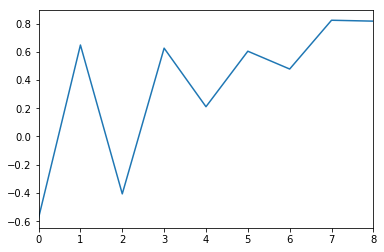

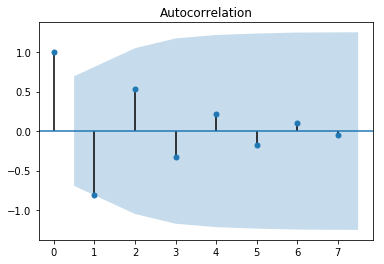

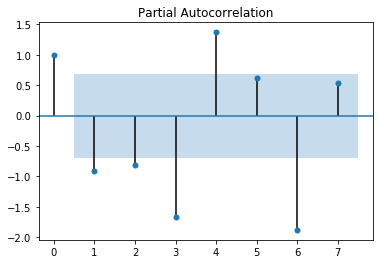

----------------------------------------------------
3422


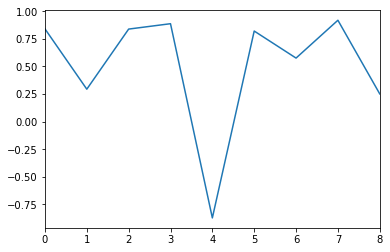

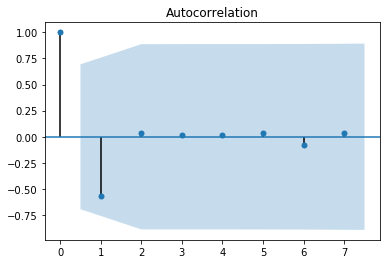

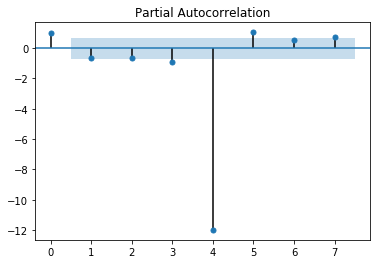

----------------------------------------------------
4316


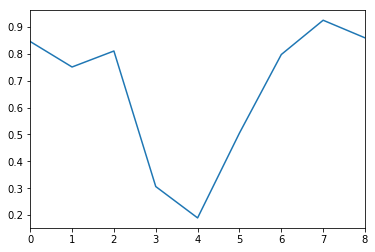

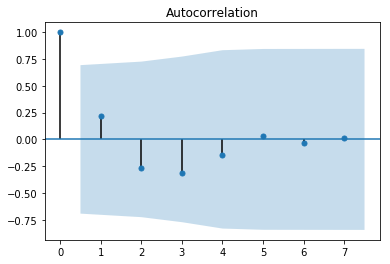

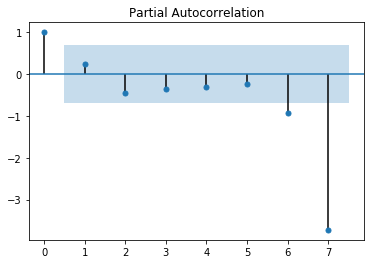

----------------------------------------------------
16296


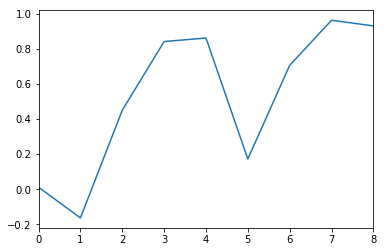

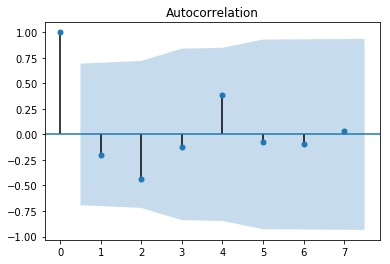

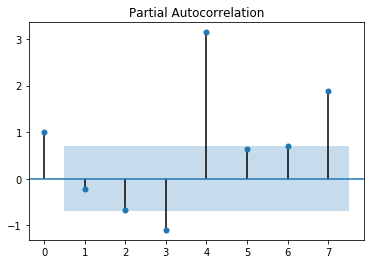

----------------------------------------------------
16683


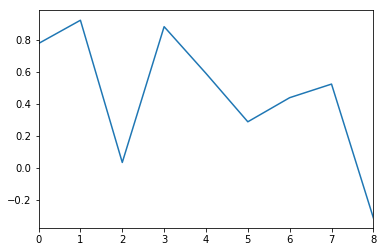

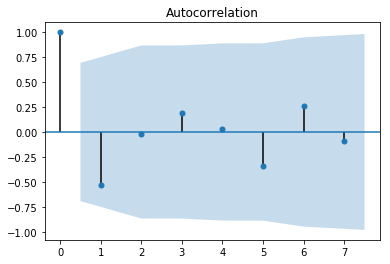

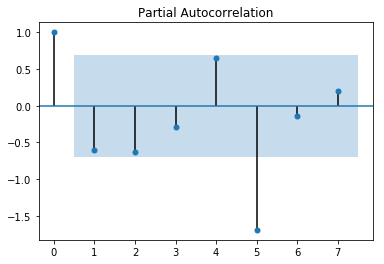

----------------------------------------------------
11414


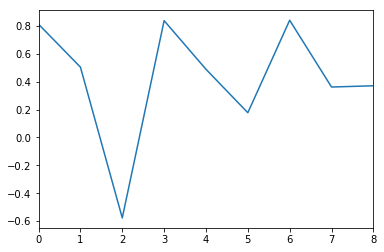

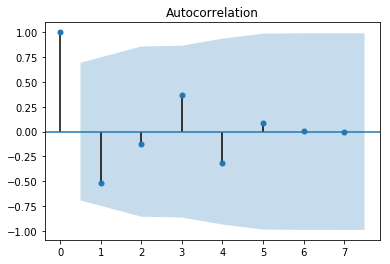

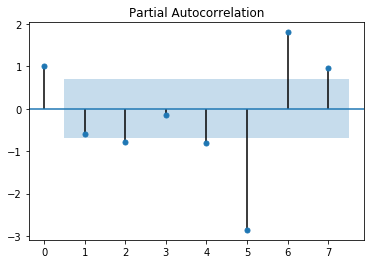

----------------------------------------------------
4720


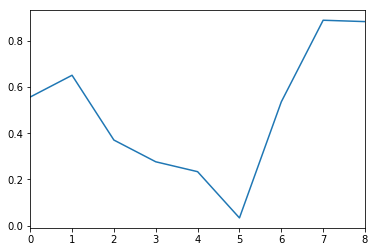

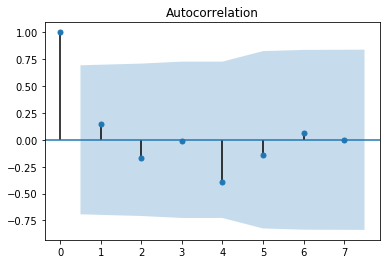

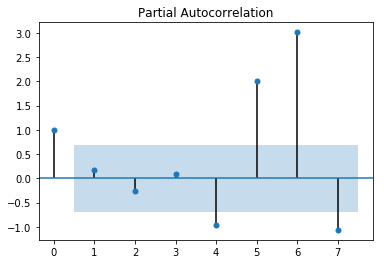

----------------------------------------------------
8376


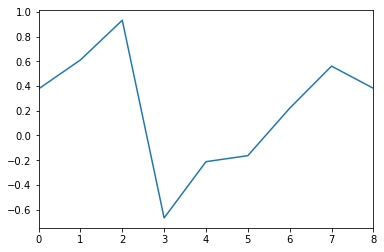

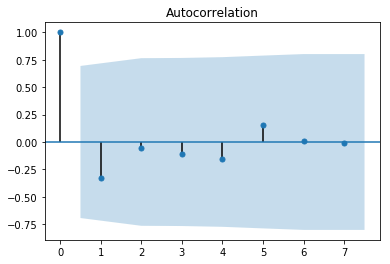

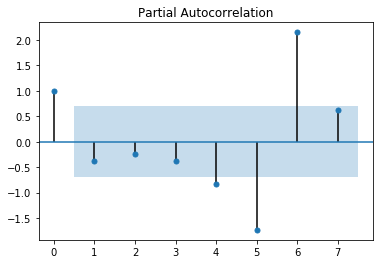

----------------------------------------------------
2837


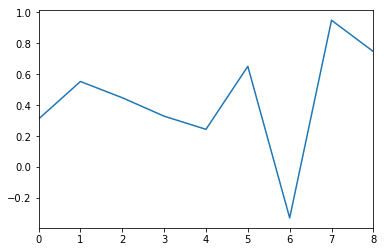

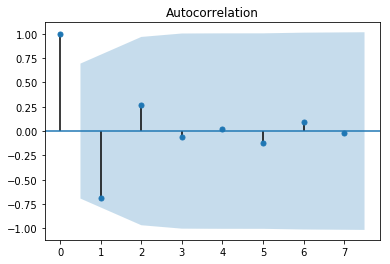

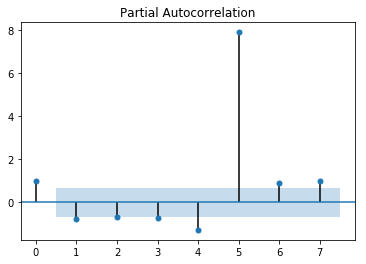

----------------------------------------------------
11943


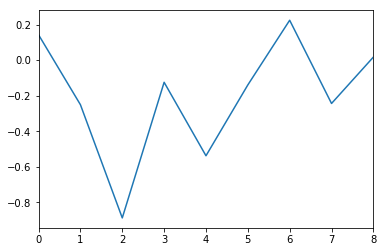

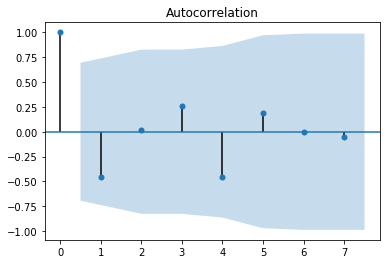

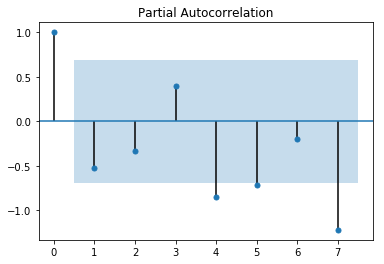

----------------------------------------------------
2229


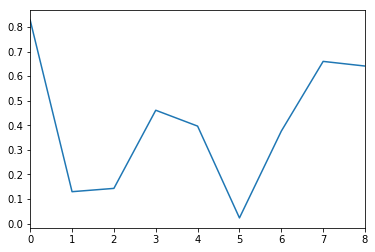

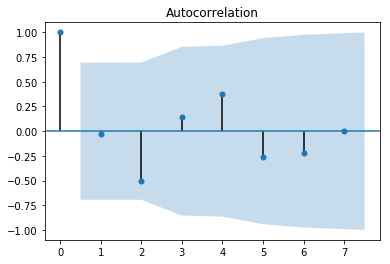

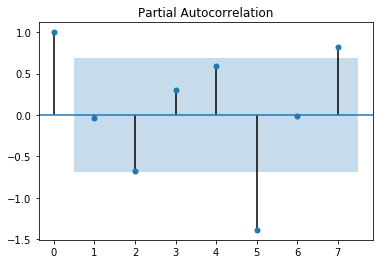

----------------------------------------------------
537


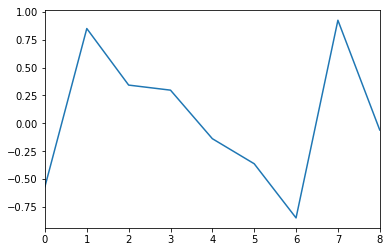

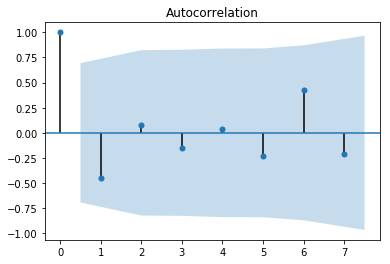

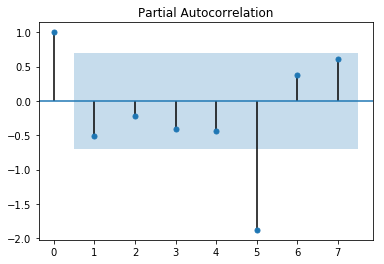

----------------------------------------------------
9003


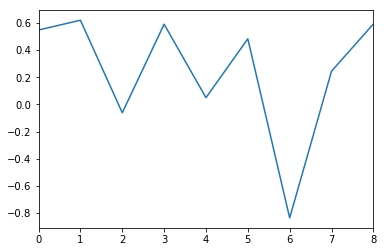

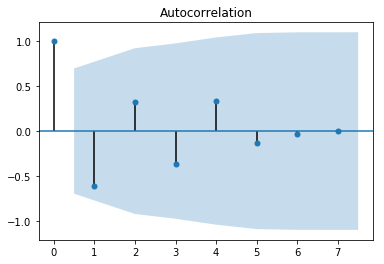

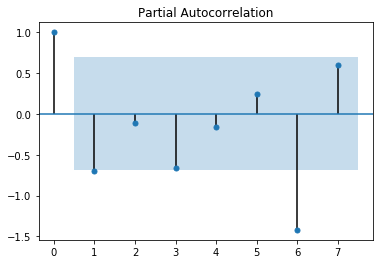

----------------------------------------------------
12888


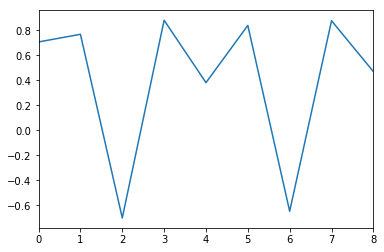

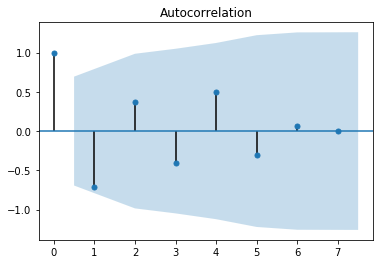

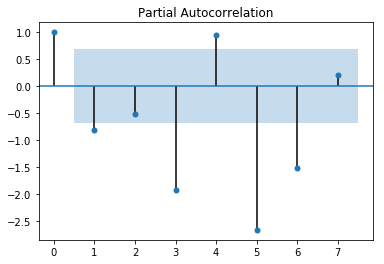

----------------------------------------------------
18029


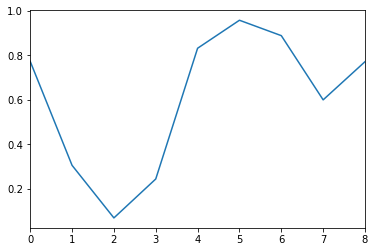

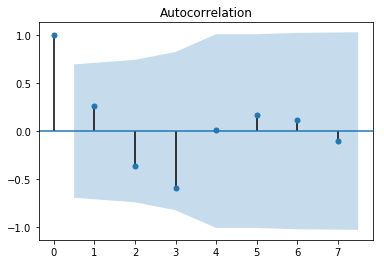

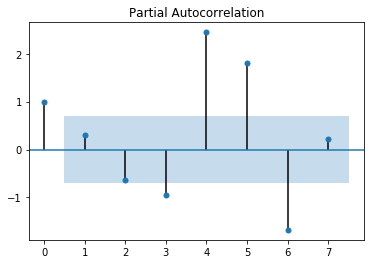

----------------------------------------------------
1267


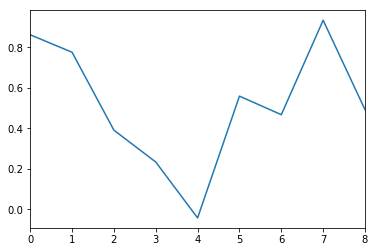

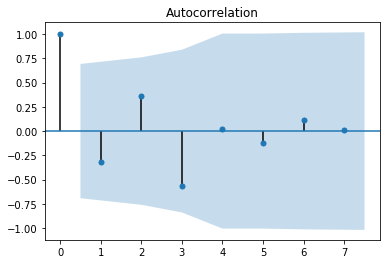

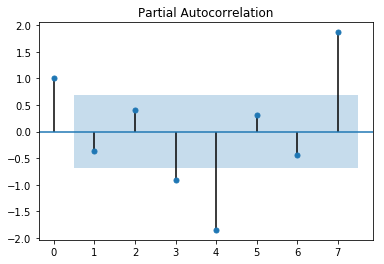

----------------------------------------------------
15801


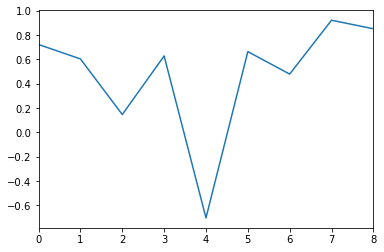

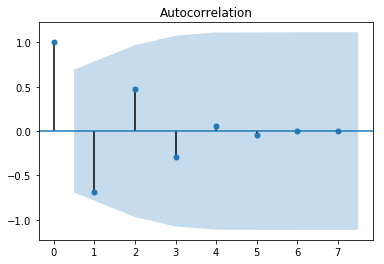

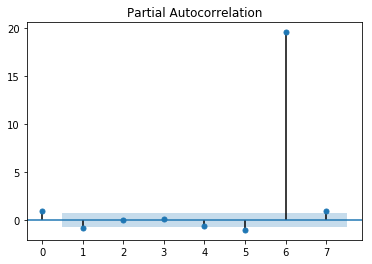

----------------------------------------------------
9504


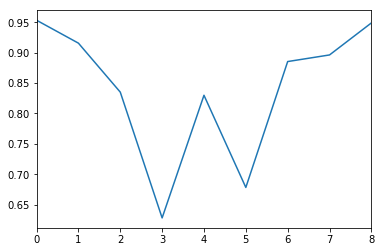

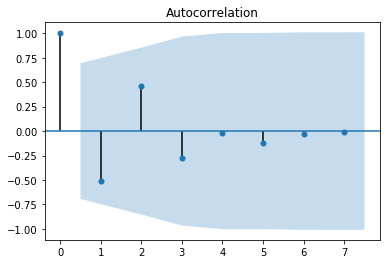

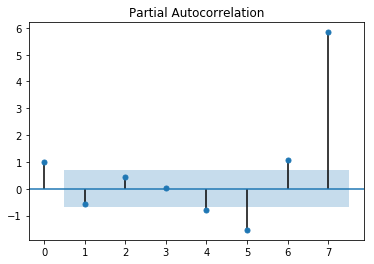

----------------------------------------------------
8604


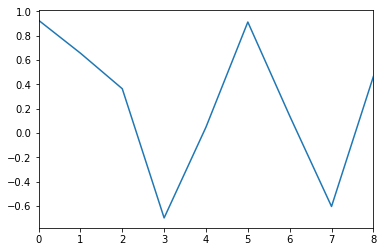

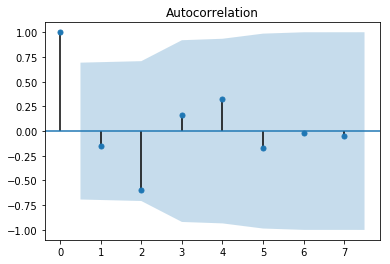

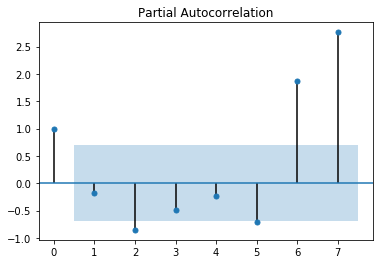

----------------------------------------------------
7239


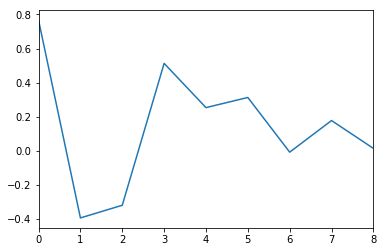

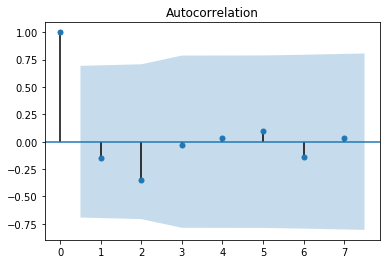

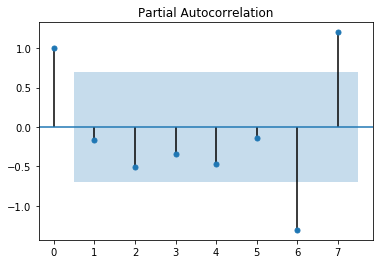

----------------------------------------------------
7395


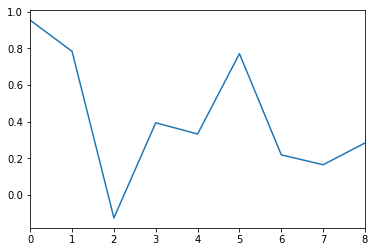

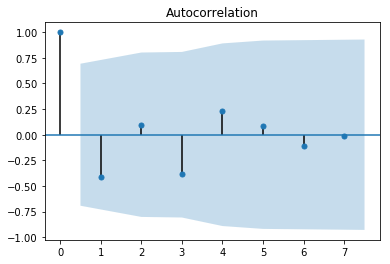

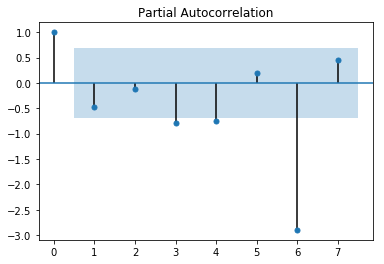

----------------------------------------------------
15078


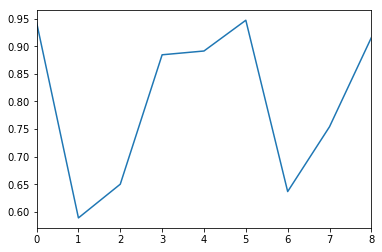

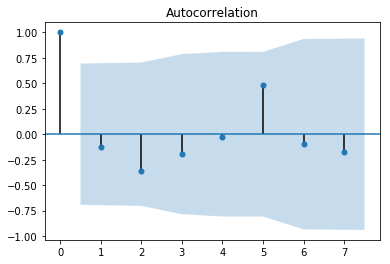

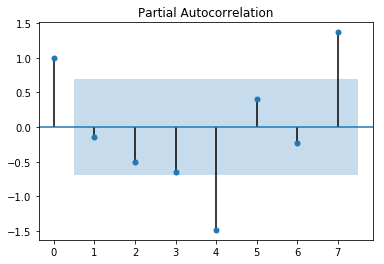

----------------------------------------------------
5043


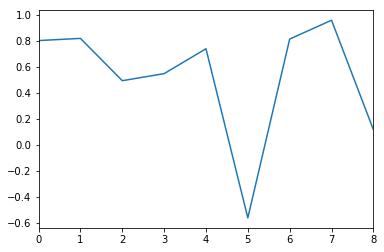

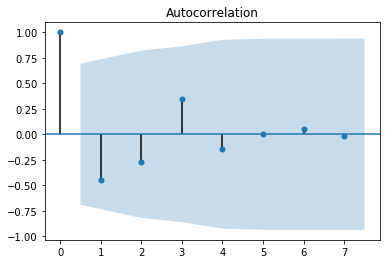

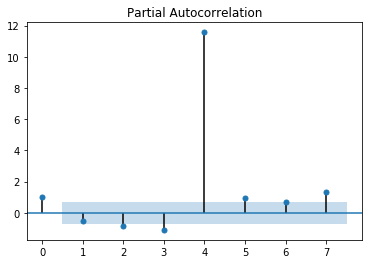

----------------------------------------------------
1119


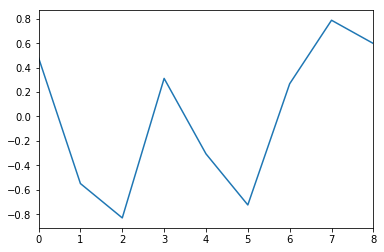

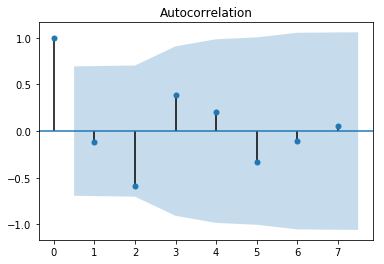

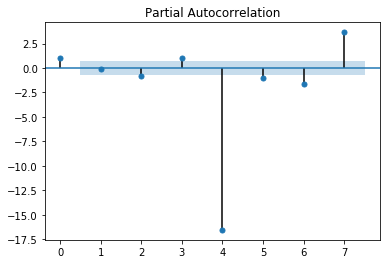

----------------------------------------------------
11856


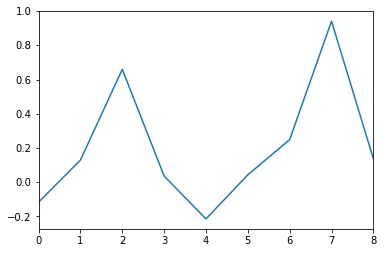

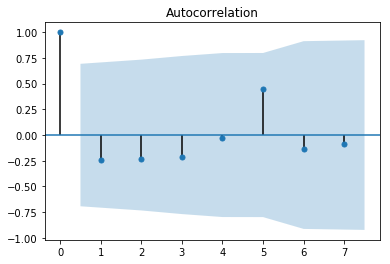

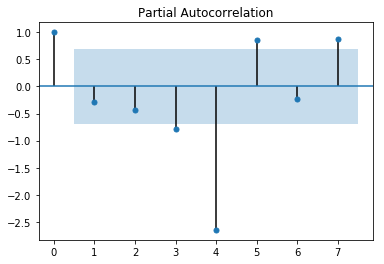

----------------------------------------------------
17029


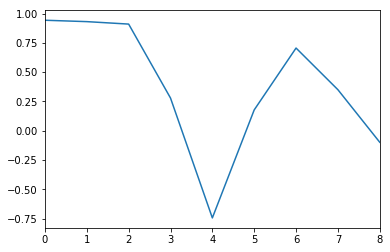

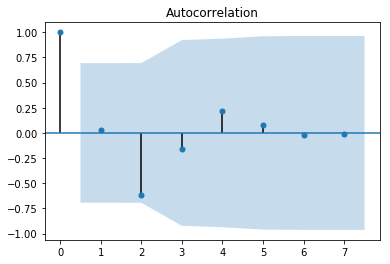

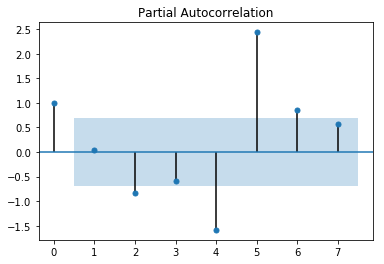

----------------------------------------------------
10728


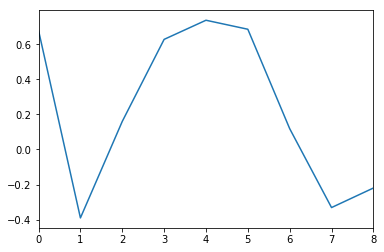

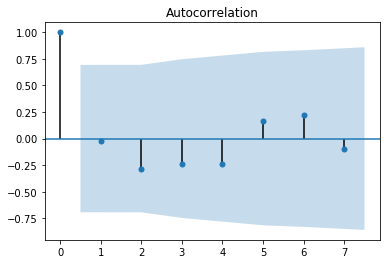

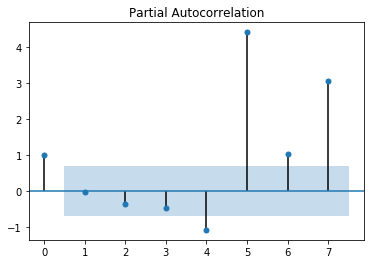

----------------------------------------------------
4363


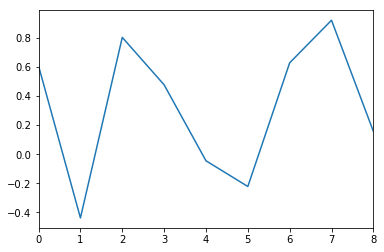

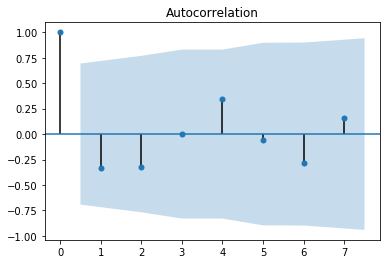

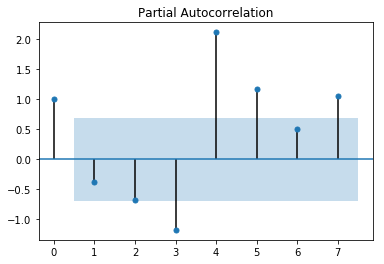

----------------------------------------------------
4262


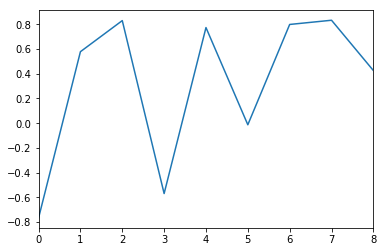

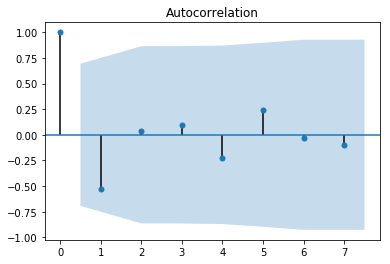

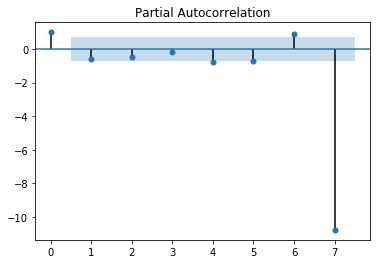

----------------------------------------------------
16595


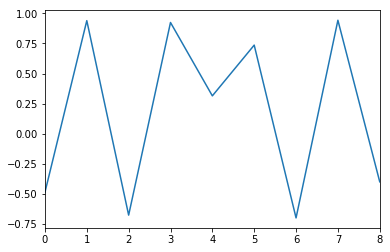

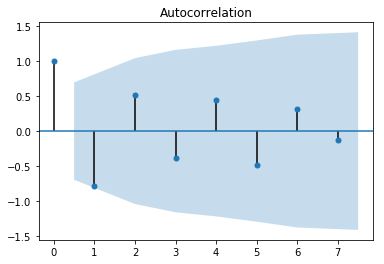

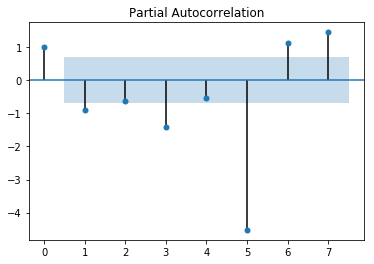

----------------------------------------------------
17733


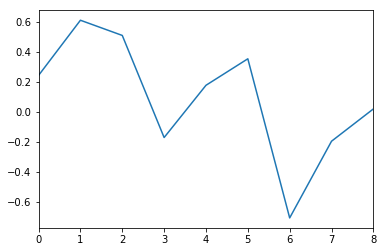

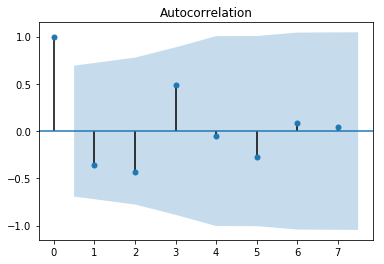

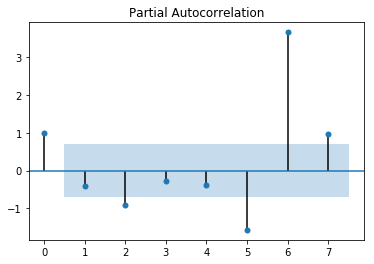

----------------------------------------------------
8958


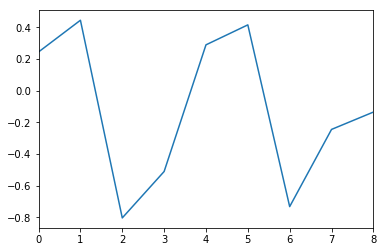

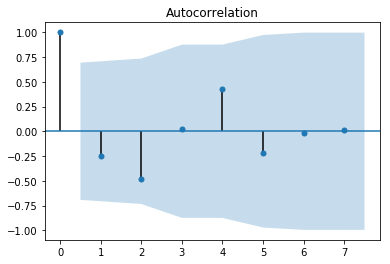

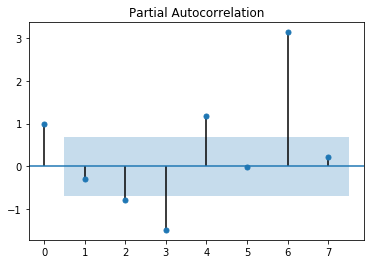

----------------------------------------------------
14691


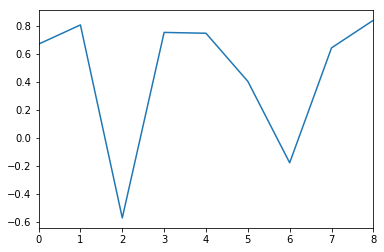

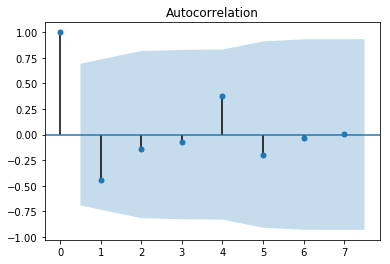

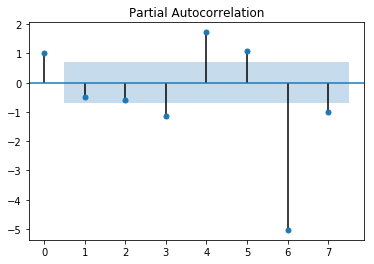

----------------------------------------------------
5229


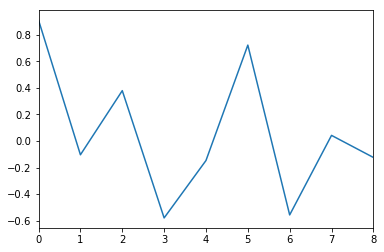

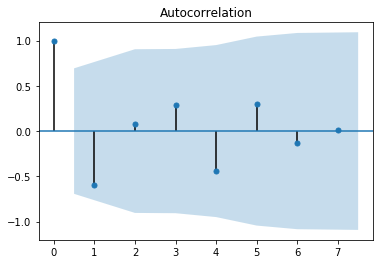

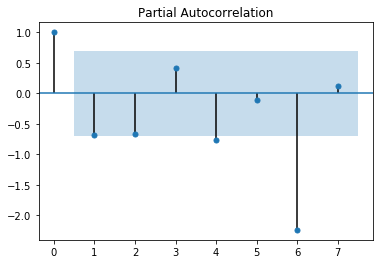

----------------------------------------------------
12819


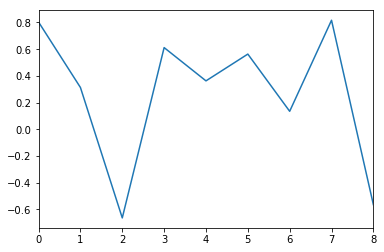

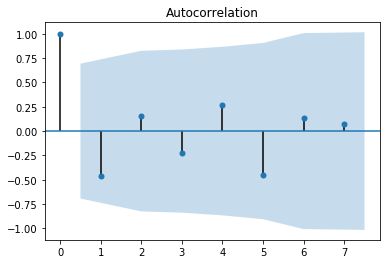

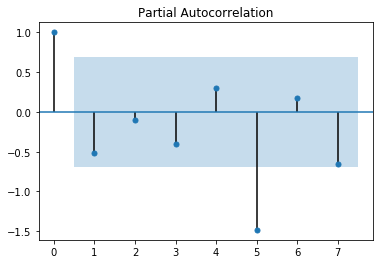

----------------------------------------------------
14878


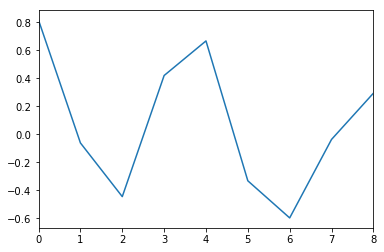

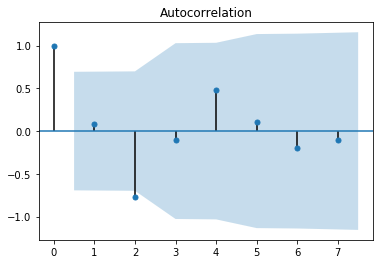

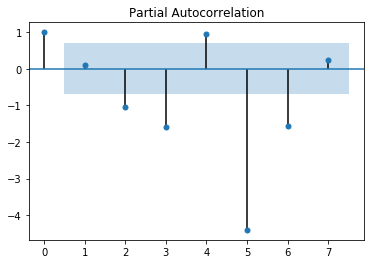

----------------------------------------------------
9871


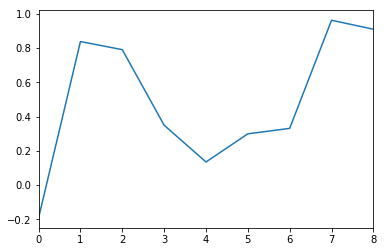

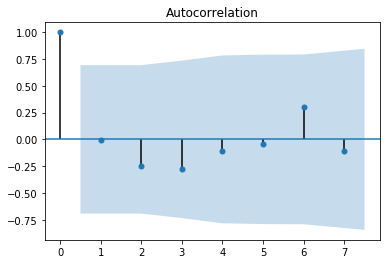

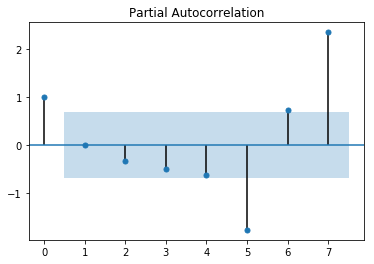

----------------------------------------------------
14180


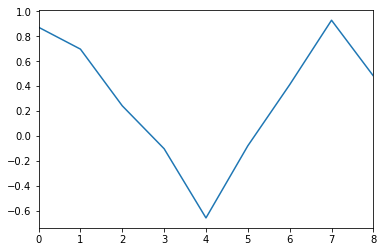

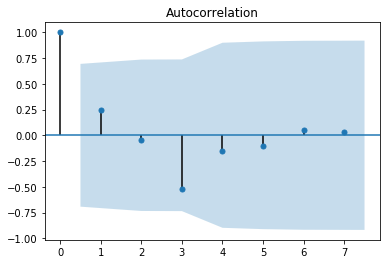

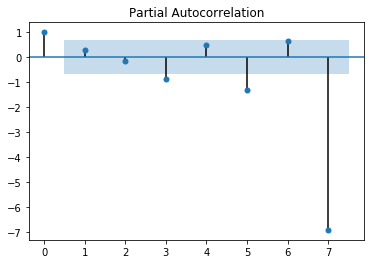

----------------------------------------------------
16571


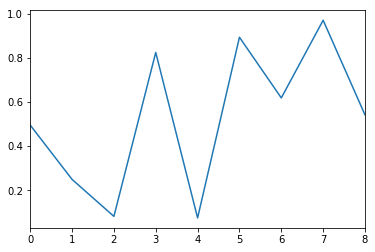

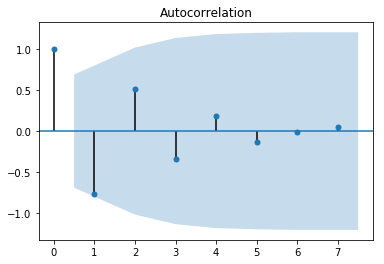

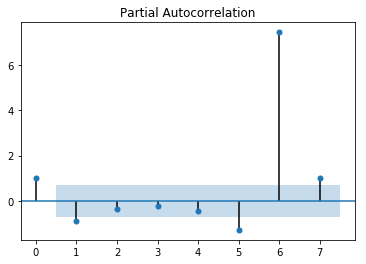

----------------------------------------------------
17727


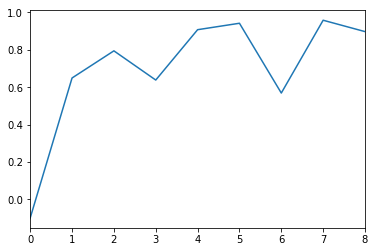

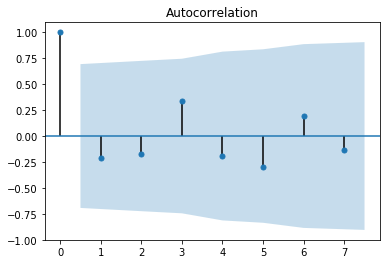

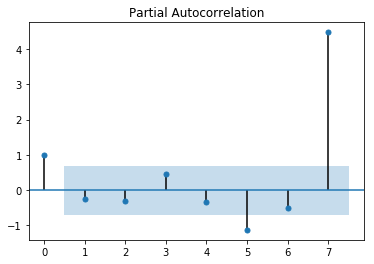

----------------------------------------------------
16409


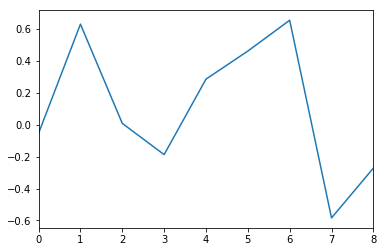

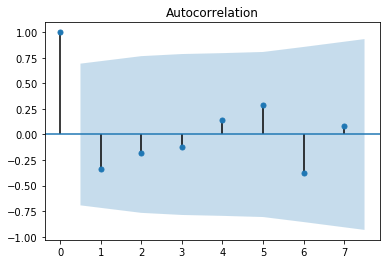

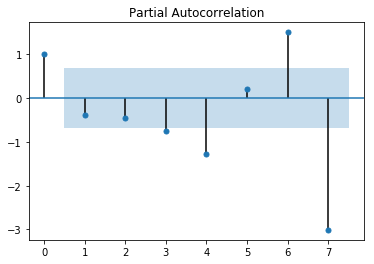

----------------------------------------------------
16466


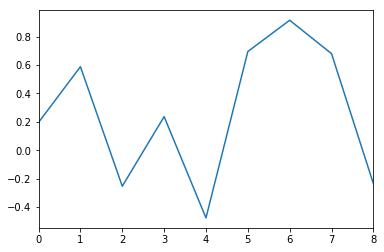

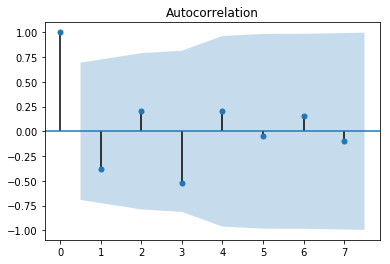

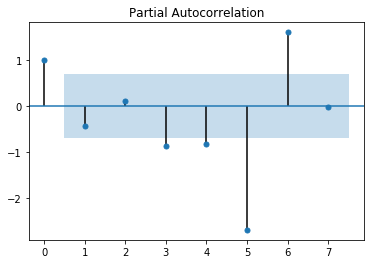

----------------------------------------------------
18210


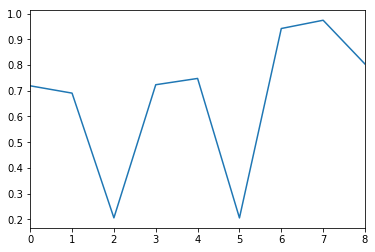

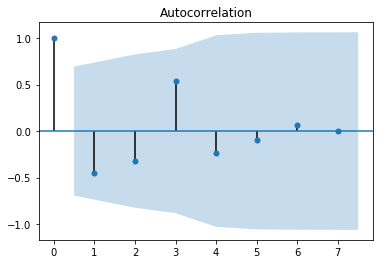

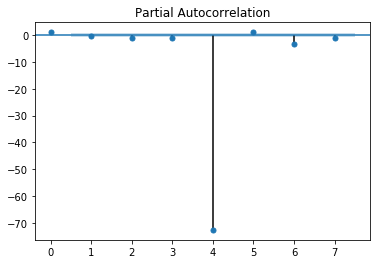

----------------------------------------------------
9295


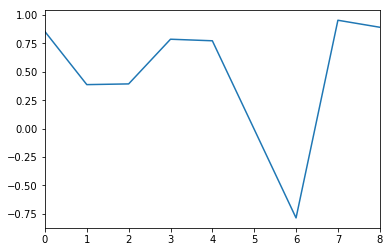

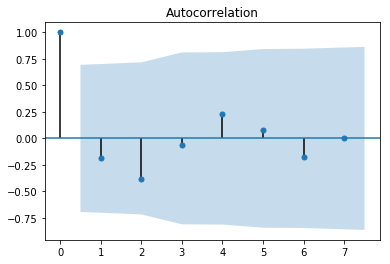

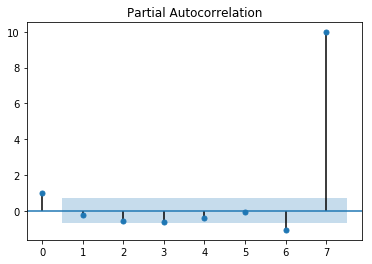

----------------------------------------------------
354


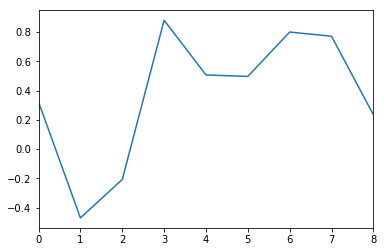

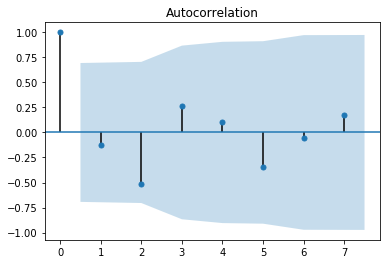

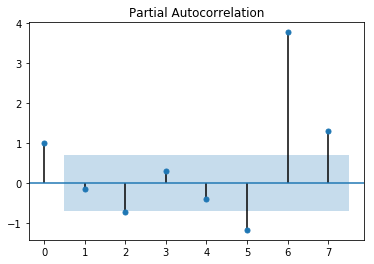

----------------------------------------------------
10378


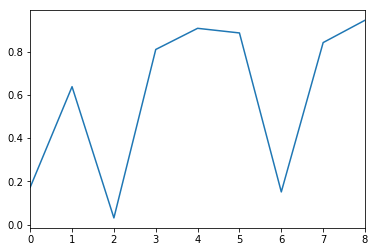

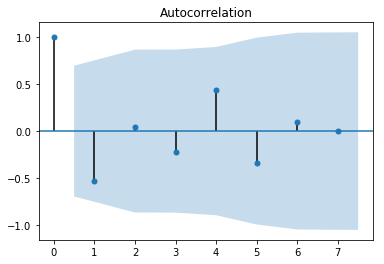

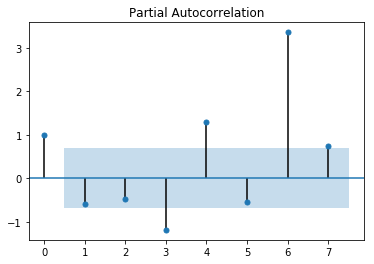

----------------------------------------------------
12380


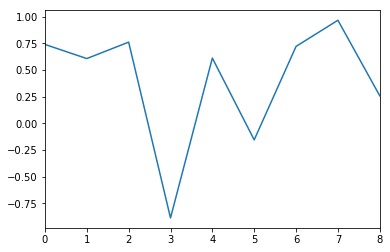

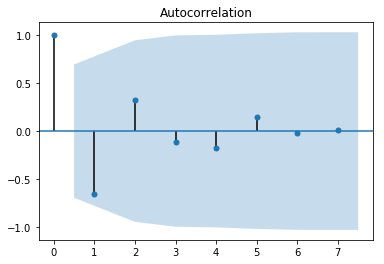

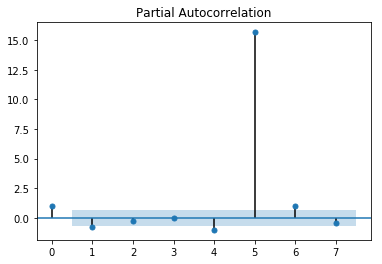

----------------------------------------------------
17720


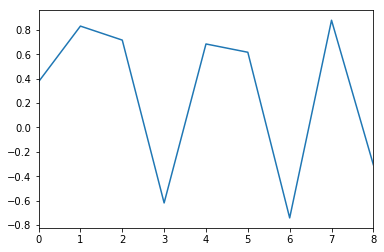

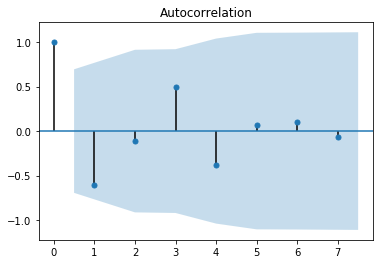

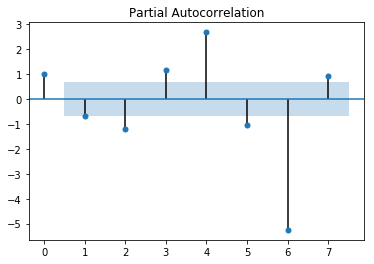

----------------------------------------------------
5519


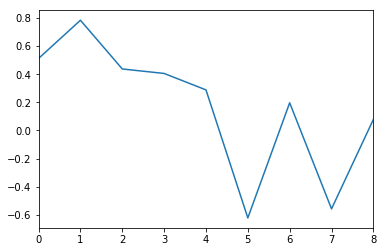

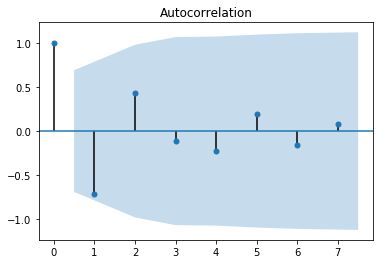

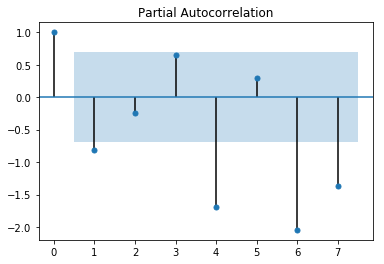

----------------------------------------------------
7908


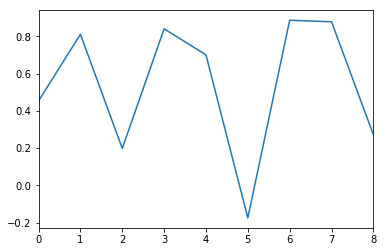

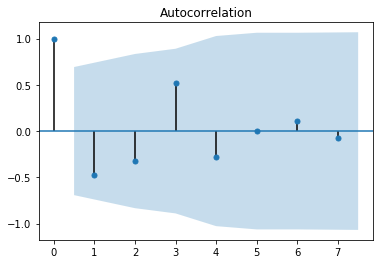

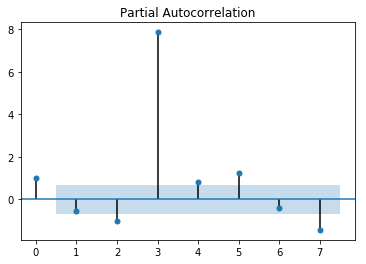

----------------------------------------------------
5224


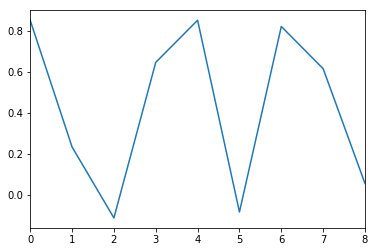

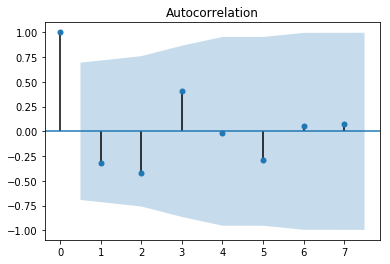

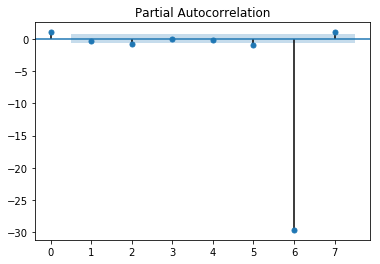

----------------------------------------------------
8909


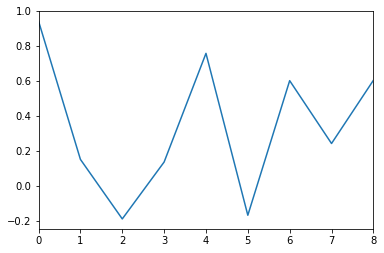

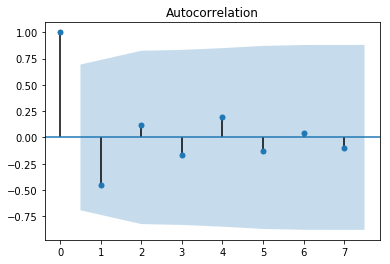

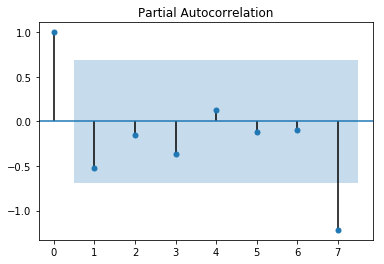

----------------------------------------------------
5422


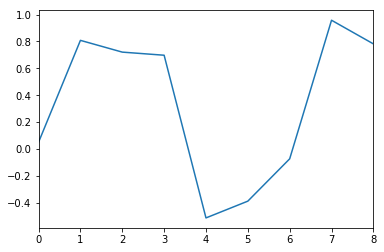

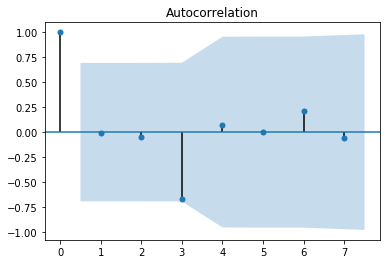

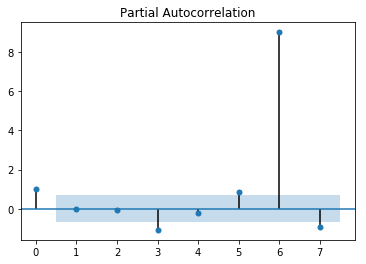

----------------------------------------------------
14457


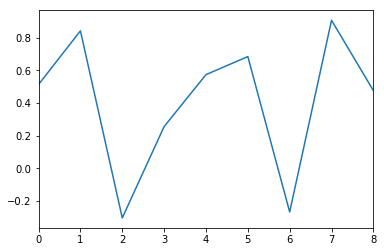

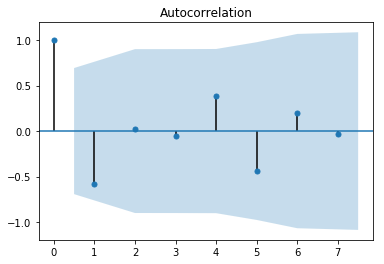

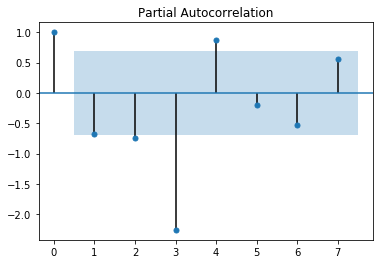

----------------------------------------------------
17577


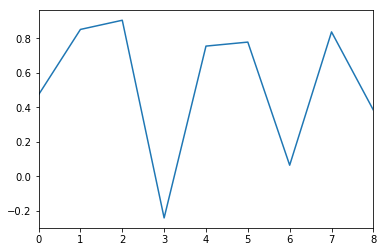

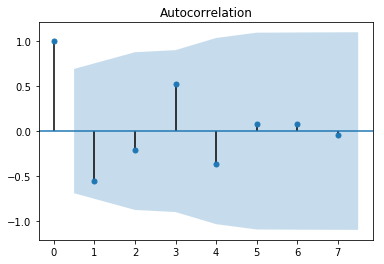

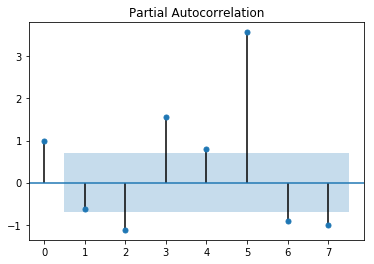

----------------------------------------------------
12448


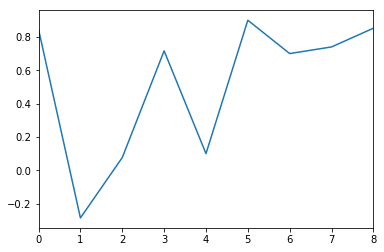

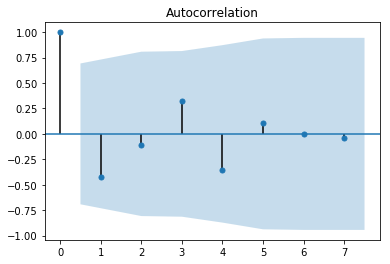

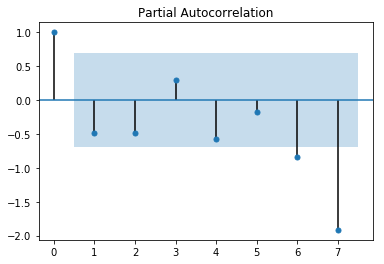

----------------------------------------------------
14707


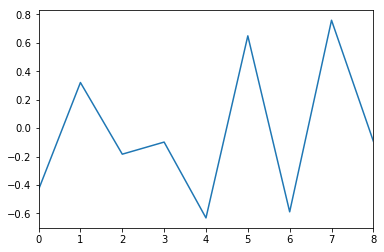

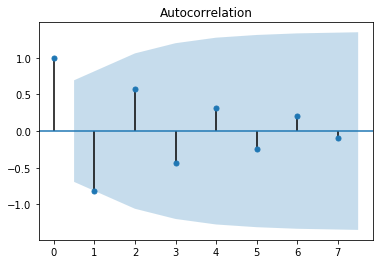

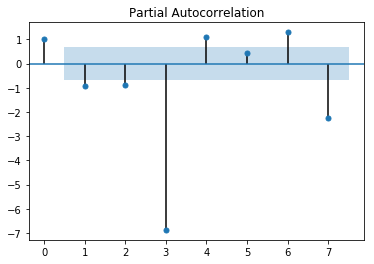

----------------------------------------------------
2864


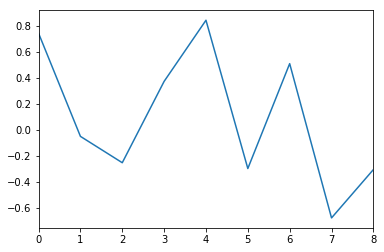

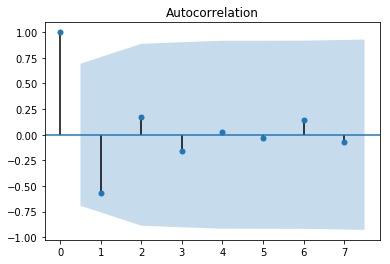

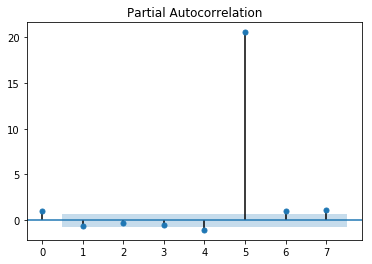

----------------------------------------------------
8191


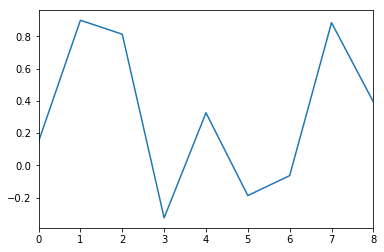

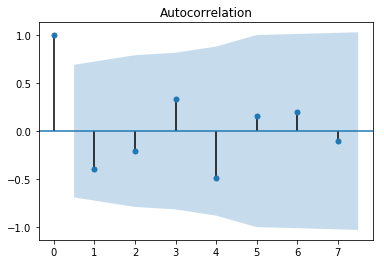

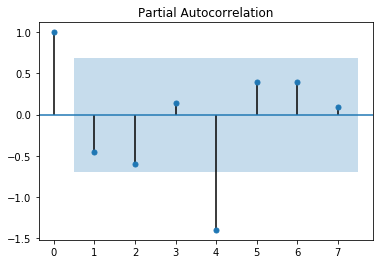

----------------------------------------------------
8792


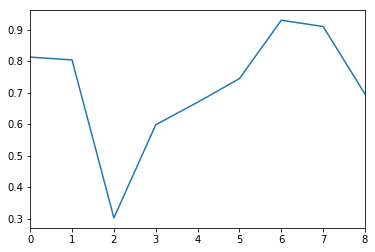

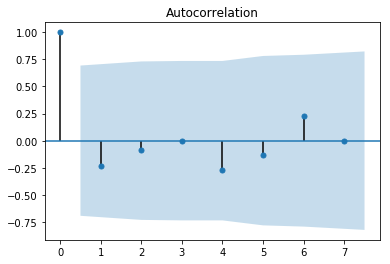

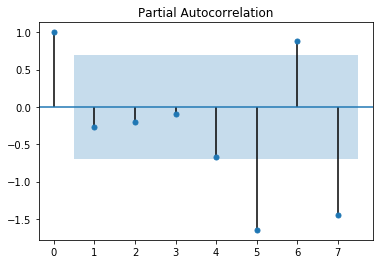

----------------------------------------------------
17460


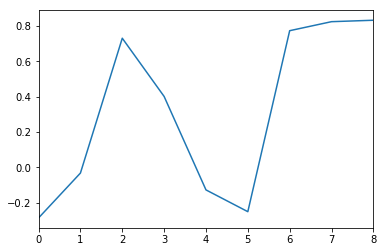

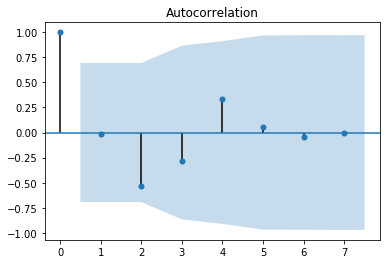

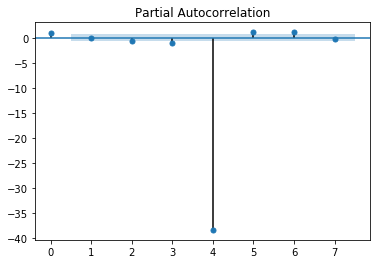

----------------------------------------------------
1585


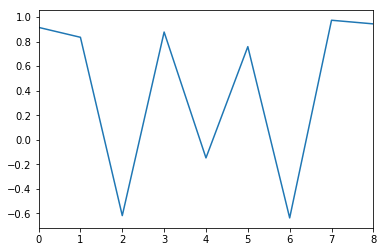

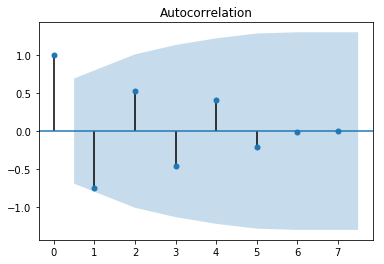

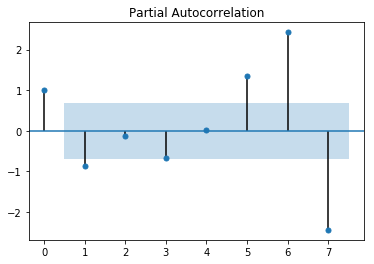

----------------------------------------------------


In [15]:
train = pd.read_csv('train.csv')
train = np.transpose(train.loc[:, ~train.columns.str.contains('^Unnamed')])
for _ in range(100):
    randint = random.randrange(0,b,1)
    print(randint)
    train[randint].plot()
    plt.show()
    plt.close()
    plot_acf(train[randint].diff()[1:])
    plt.show()
    plt.close()
    plot_pacf(train[randint].diff()[1:])
    plt.show()
    plt.close()
    print('----------------------------------------------------')

In [58]:
stat = pd.DataFrame()
for i in range(b):
    df = train[i].describe()
    stat[i] = df
stat


KeyError: 0

In [20]:
mean = sorted(np.array(stat.iloc[1,:].copy()))
stdev = sorted(np.array(stat.iloc[2,:].copy()))
fit1 = stats.norm.pdf(mean, np.mean(mean), np.std(mean))
fit2 = stats.norm.pdf(stdev, np.mean(stdev), np.std(stdev))

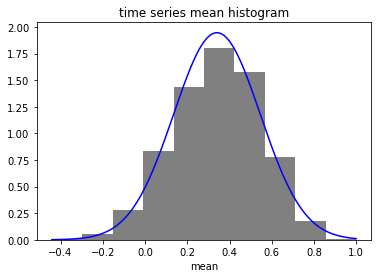

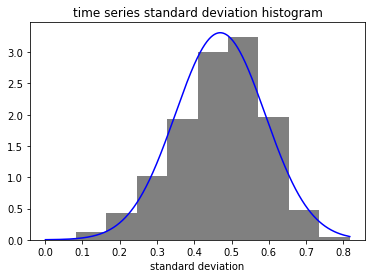

In [21]:
pl.plot(mean,fit1,color='blue')
pl.hist(mean,normed=True,color='grey')
pl.title('time series mean histogram')
pl.xlabel('mean')
pl.show()
pl.close()
pl.plot(stdev,fit2,color='blue')
pl.hist(stdev,normed=True,color='grey')
pl.title('time series standard deviation histogram')
pl.xlabel('standard deviation')
pl.show()
pl.close()

In [60]:
train = pd.read_csv('train.csv')
dev = pd.read_csv('dev.csv')
test1 = pd.read_csv('test1.csv')
test2 = pd.read_csv('test2.csv')

train = np.transpose(train.loc[:,~train.columns.str.contains('^Unnamed')])
dev = np.transpose(dev.loc[:,~dev.columns.str.contains('^Unnamed')])
test1 = np.transpose(test1.loc[:,~test1.columns.str.contains('^Unnamed')])
test2 = np.transpose(test2.loc[:,~test2.columns.str.contains('^Unnamed')])

datasets = [train, dev, test1, test2]

In [61]:
datasets[0].head()

0         1         2         3         4         5         6     \
0  0.640992  0.786429  0.804356  0.860255  0.281914  0.843116 -0.587288   
1 -0.229835  0.779735 -0.775493 -0.000122  0.663793  0.245141 -0.400258   
2  0.920756  0.903373  0.872319  0.714044  0.920666  0.992769 -0.125440   
3 -0.573034  0.764900 -0.312158  0.515840  0.860739  0.405946 -0.062833   
4  0.829274  0.805876  0.886606 -0.686730  0.871303  0.926249 -0.713905   

       7         8         9     ...      3645      3646      3647      3648  \
0 -0.315293 -0.744049  0.820352  ... -0.125208  0.242812  0.070002  0.086128   
1 -0.002169 -0.456081  0.505617  ... -0.593911  0.507365 -0.724776 -0.446952   
2  0.899159  0.181066  0.540799  ...  0.869841  0.860952  0.721056  0.675275   
3  0.824249  0.829615  0.425343  ... -0.862455  0.471663 -0.678169  0.150837   
4 -0.674857  0.961213  0.180953  ...  0.681268  0.582762  0.831910 -0.794204   

       3649      3650      3651      3652      3653      3654  
0  0.838291  0.753711  0.942160  0.785884  0.705666  0.362682  
1  0.833110  0.321267  0.382059  0.397974 -0.639196  0.189809  
2  0.522659  0.852661  0.629072  0.839127  0.789564  0.826723  
3  0.271068  0.693369  0.585600  0.863894  0.176751 -0.146596  
4 -0.266678 -0.453590 -0.570799  0.850167  0.868754  0.829108  

[5 rows x 3655 columns]

In [ ]:
model_110 = ARIMA(order=(1,1,0), method='mle', suppress_warnings=True)
model_011 = ARIMA(order=(0,1,1), method='mle', suppress_warnings=True)
model_111 = ARIMA(order=(1,1,1), method='mle', suppress_warnings=True)
model_211 = ARIMA(order=(2,1,1), method='mle', suppress_warnings=True)
model_210 = ARIMA(order=(2,1,0), method='mle', suppress_warnings=True)

train_X = []; train_Y = []
dev_X = []; dev_Y = []
test1_X = []; test1_Y = []
test2_X = []; test2_Y = []

flag = 0




In [ ]:
for i in range(b):
    #if i % 500 == 0:
    print(i)
    tmp = []
    c=0
    for s in datasets :
        c+=1
        try:
            model1 = model_110.fit(s[i])
            model = model1
            
            try:
                model2 = model_011.fit(s[i])
                
                if model.aic() <= model2.aic() :
                    pass
                else :
                    model = model2
                    
                try :
                    model3 = model_111.fit(s[i])
                    if model.aic() <= model3.aic() :
                        pass
                    else :
                        model = model3
                except :
                    try:
                        model4 = model_211.fit(s[i])
                        
                        if model.aic() <= model4.aic() :
                            pass
                        else:
                            model = model4
                    except:
                        try:
                            model5 = model_210.fit(s[i])
                            
                            if model.aic() <= model5.aic():
                                pass
                            else :
                                model = model5
                        except :
                            pass
                    
            except:
                try:
                    model3 = model_111.fit(s[i])

                    if model.aic() <= model3.aic() :
                        pass
                    else :
                        model = model3
                except :
                    try:
                        model4 = model_211.fit(s[i])
                        
                        if model.aic() <= model4.aic() :
                            pass
                        else:
                            model = model4
                    except:
                        try:
                            model5 = model_210.fit(s[i])
                            
                            if model.aic() <= model5.aic():
                                pass
                            else :
                                model = model5
                        except :
                            pass
                
        except:
            try:
                model2 = model_011.fit(s[i])
                model = model2
            
                try :
                    model3 = model_111.fit(s[i])
                    
                    if model.aic() <= model3.aic():
                        pass
                    else:
                        model = model3
                except :
                    try:
                        model4 = model_211.fit(s[i])
                        
                        if model.aic() <= model4.aic() :
                            pass
                        else:
                            model = model4
                    except:
                        try:
                            model5 = model_210.fit(s[i])
                            
                            if model.aic() <= model5.aic():
                                pass
                            else :
                                model = model5
                        except :
                            pass
            
            except :
                try:
                    model3 = model_111.fit(s[i])
                    model = model3
                except :
                    try:
                        model4 = model_211.fit(s[i])
                        
                        if model.aic() <= model4.aic() :
                            pass
                        else:
                            model = model4
                    except:
                        model5 = model_210.fit(s[i])
                        try:
                            model5 = model_210.fit(s[i])
                            
                            if model.aic() <= model5.aic():
                                pass
                            else :
                                model = model5
                        except :
                            flag = 1
                            print(str(c) + " FATAL ERROR")
                            break
        
        predictions = list(model.predict_in_sample())
        #pad the first time step of predictions with the average of the prediction values
        #so as to match the length of the s[i] data
        predictions = [np.mean(predictions)] + predictions
        
        residual = pd.Series(np.array(s[i]) - np.array(predictions))
        tmp.append(np.array(residual))
        
                   
    if flag == 1:
        break
    train_X.append(tmp[0][:20])
    train_Y.append(tmp[0][20])
    dev_X.append(tmp[1][:20])
    dev_Y.append(tmp[1][20])
    test1_X.append(tmp[2][:20])
    test1_Y.append(tmp[2][20])
    test2_X.append(tmp[3][:20])
    test2_Y.append(tmp[3][20])